In [1]:
# import geopandas as gpd
# import geopy
# from shapely.geometry import Point
# from geopy.geocoders import Nominatim

import pandas as pd
import numpy as np

import mpu
import seaborn as sns

#pd.set_option('display.max_rows', 10000)
#pd.set_option('display.max_columns', 10000)
#pd.set_option('display.width', 10000)


In [2]:
df = pd.read_excel('atm_bank_misr (copy).xlsx')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4263 non-null   int64  
 1   governerate  4263 non-null   object 
 2   region       4263 non-null   object 
 3   Address      4263 non-null   object 
 4   Lat          4263 non-null   float64
 5   Long         4263 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 200.0+ KB


In [3]:
df.head()

,ID,governerate,region,Address,Lat,Long
0,1,Al Fayyum,Markaz Al-Fayyum,Alfayoum Beghous Alhoriea St.,29.304412,30.853546
1,2,Al Fayyum,Markaz Al-Fayyum,Fayoum University,29.319696,30.835641
2,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,29.308199,30.842229
3,4,Al Fayyum,Markaz Sinnuris,Sanoras - Fayoum,29.408575,30.865073
4,5,Al Fayyum,Markaz Itsa,194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum,29.236966,30.790194


In [4]:
df.iloc[[55,132]]

,ID,governerate,region,Address,Lat,Long
55,56,Al Buhayrah,Markaz Abu Hummus,The local unit - Abo Homos,31.100602,30.31555
132,133,Al Buhayrah,Markaz Abu Hummus,The local unit - Abo Homos,31.100602,30.31555


In [7]:
lat_longs = np.array(df[['Lat','Long']])#

In [8]:
df

,ID,governerate,region,Address,Lat,Long
0,1,Al Fayyum,Markaz Al-Fayyum,Alfayoum Beghous Alhoriea St.,29.304412,30.853546
1,2,Al Fayyum,Markaz Al-Fayyum,Fayoum University,29.319696,30.835641
2,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,29.308199,30.842229
3,4,Al Fayyum,Markaz Sinnuris,Sanoras - Fayoum,29.408575,30.865073
4,5,Al Fayyum,Markaz Itsa,194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum,29.236966,30.790194
...,...,...,...,...,...,...
4258,4259,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833
4259,4260,As Suways,Kism 'Ataqah,K 36 Suez - Ain Sokhna Road,29.728850,32.381612
4260,4261,As Suways,Kism 'Ataqah,Suez Sokhna Road Canary Village,29.617352,32.317460
4261,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257


In [9]:
k = 4


near_dis1 = [] # distance of nearest atm
index1 = [] # index of nearest atm

near_dis2 = []
index2 = []

near_dis3 = []
index3 = []

for i in range(len(lat_longs)):
    err_list = []
    
    for j in range(len(lat_longs)): 
        
        lat1,lon1,lat2,lon2 = lat_longs[i][0],lat_longs[i][1],lat_longs[j][0],lat_longs[j][1]
        err_list.append(mpu.haversine_distance((lat1, lon1), (lat2, lon2)))
    
    distances = np.array(err_list)
    least_k = np.argsort(distances)[1:k]
    print('Indexes of nearest lat_long',least_k)
    print('For lat_long',lat_longs[i],'the nearest lat_longs are:')
    print(lat_longs[least_k])
    print('With distances of:') 
    print(distances[least_k])
    
    least_k_distances = distances[least_k]
    near_dis1.append(least_k_distances[0])
    index1.append(least_k[0])
    near_dis2.append(least_k_distances[1])
    index2.append(least_k[1])
    near_dis3.append(least_k_distances[2])
    index3.append(least_k[2])
    print('-------------------------------------')
    
    
    
    
    

Indexes of nearest lat_long [21 29  9]
For lat_long [29.30441208 30.85354563] the nearest lat_longs are:
[[29.3029927  30.85296321]
 [29.308889   30.847499  ]
 [29.308889   30.847499  ]]
With distances of:
[0.1676278  0.76913315 0.76913315]
-------------------------------------
Indexes of nearest lat_long [32  7 31]
For lat_long [29.319696 30.835641] the nearest lat_longs are:
[[29.319696 30.835641]
 [29.321487 30.837896]
 [29.322145 30.837087]]
With distances of:
[0.         0.29573057 0.30628301]
-------------------------------------
Indexes of nearest lat_long [ 2  5 35]
For lat_long [29.308199 30.842229] the nearest lat_longs are:
[[29.308199   30.842229  ]
 [29.30772267 30.84613982]
 [29.304818   30.84385   ]]
With distances of:
[0.         0.38288298 0.40748412]
-------------------------------------
Indexes of nearest lat_long [16 25 20]
For lat_long [29.40857519 30.86507307] the nearest lat_longs are:
[[29.4087034  30.8587204 ]
 [29.41540081 30.86429428]
 [29.39694049 30.8246841

Indexes of nearest lat_long [8 7 1]
For lat_long [29.322145 30.837087] the nearest lat_longs are:
[[29.322145 30.837087]
 [29.321487 30.837896]
 [29.319696 30.835641]]
With distances of:
[0.         0.10726059 0.30628301]
-------------------------------------
Indexes of nearest lat_long [32  7 31]
For lat_long [29.319696 30.835641] the nearest lat_longs are:
[[29.319696 30.835641]
 [29.321487 30.837896]
 [29.322145 30.837087]]
With distances of:
[0.         0.29573057 0.30628301]
-------------------------------------
Indexes of nearest lat_long [34 12 14]
For lat_long [29.319011 30.851452] the nearest lat_longs are:
[[29.319011   30.851452  ]
 [29.319011   30.851452  ]
 [29.31563484 30.85253097]]
With distances of:
[0.        0.        0.3897143]
-------------------------------------
Indexes of nearest lat_long [34 12 14]
For lat_long [29.319011 30.851452] the nearest lat_longs are:
[[29.319011   30.851452  ]
 [29.319011   30.851452  ]
 [29.31563484 30.85253097]]
With distances of:
[0.

Indexes of nearest lat_long [ 63 117  52]
For lat_long [31.052879 30.462731] the nearest lat_longs are:
[[31.052879   30.462731  ]
 [31.05193166 30.46430279]
 [31.051574   30.463915  ]]
With distances of:
[0.         0.18307154 0.18378776]
-------------------------------------
Indexes of nearest lat_long [181  53  70]
For lat_long [30.671835 30.073109] the nearest lat_longs are:
[[30.671835   30.073109  ]
 [30.67059438 30.07277643]
 [30.662002   30.08606   ]]
With distances of:
[0.         0.14156972 1.65221667]
-------------------------------------
Indexes of nearest lat_long [ 65 122 139]
For lat_long [31.03936  30.455253] the nearest lat_longs are:
[[31.03936    30.455253  ]
 [31.03732147 30.45559064]
 [31.03975    30.458095  ]]
With distances of:
[0.         0.2289454  0.27421691]
-------------------------------------
Indexes of nearest lat_long [139  65 137]
For lat_long [31.03975  30.458095] the nearest lat_longs are:
[[31.03975  30.458095]
 [31.03936  30.455253]
 [31.03936  30.4

Indexes of nearest lat_long [ 105 3321 3322]
For lat_long [31.288168 30.513992] the nearest lat_longs are:
[[31.288168   30.513992  ]
 [31.29008495 30.52348558]
 [31.28994018 30.52365427]]
With distances of:
[0.         0.926944   0.93904167]
-------------------------------------
Indexes of nearest lat_long [154  95 155]
For lat_long [31.041921 30.473102] the nearest lat_longs are:
[[31.041921 30.473102]
 [31.04408  30.475274]
 [31.04408  30.475274]]
With distances of:
[0.         0.31694127 0.31694127]
-------------------------------------
Indexes of nearest lat_long [185 179  72]
For lat_long [30.880486 30.653383] the nearest lat_longs are:
[[30.880486   30.653383  ]
 [30.88563219 30.65812817]
 [30.88483388 30.66364617]]
With distances of:
[0.         0.72972669 1.09223743]
-------------------------------------
Indexes of nearest lat_long [108 100 171]
For lat_long [31.301812 30.301819] the nearest lat_longs are:
[[31.301812 30.301819]
 [31.392898 30.414696]
 [31.392898 30.414696]]
W

Indexes of nearest lat_long [109  76 140]
For lat_long [31.040307 30.468207] the nearest lat_longs are:
[[31.040307   30.468207  ]
 [31.04241948 30.46890924]
 [31.04241948 30.46890924]]
With distances of:
[0.         0.24423864 0.24423898]
-------------------------------------
Indexes of nearest lat_long [ 65 122 139]
For lat_long [31.03936  30.455253] the nearest lat_longs are:
[[31.03936    30.455253  ]
 [31.03732147 30.45559064]
 [31.03975    30.458095  ]]
With distances of:
[0.         0.2289454  0.27421691]
-------------------------------------
Indexes of nearest lat_long [93 83 72]
For lat_long [30.88655  30.667319] the nearest lat_longs are:
[[30.886553   30.667319  ]
 [30.884864   30.665297  ]
 [30.88483388 30.66364617]]
With distances of:
[3.33584780e-04 2.69030716e-01 3.99066874e-01]
-------------------------------------
Indexes of nearest lat_long [139  65 137]
For lat_long [31.03975  30.458095] the nearest lat_longs are:
[[31.03975  30.458095]
 [31.03936  30.455253]
 [31.03

Indexes of nearest lat_long [ 60  51 163]
For lat_long [30.5761452 30.7090382] the nearest lat_longs are:
[[30.57726731 30.71009132]
 [30.57747    30.710336  ]
 [30.57747    30.710336  ]]
With distances of:
[0.16041349 0.19270886 0.19270886]
-------------------------------------
Indexes of nearest lat_long [181  53  70]
For lat_long [30.671835 30.073109] the nearest lat_longs are:
[[30.671835   30.073109  ]
 [30.67059438 30.07277643]
 [30.662002   30.08606   ]]
With distances of:
[0.         0.14156972 1.65221667]
-------------------------------------
Indexes of nearest lat_long [182  53  64]
For lat_long [30.662002 30.08606 ] the nearest lat_longs are:
[[30.662002   30.08606   ]
 [30.67059438 30.07277643]
 [30.671835   30.073109  ]]
With distances of:
[0.         1.58966042 1.65221667]
-------------------------------------
Indexes of nearest lat_long [ 69 120 182]
For lat_long [30.632194 30.2275  ] the nearest lat_longs are:
[[30.632194  30.2275   ]
 [30.7009946 30.2682834]
 [30.66200

Indexes of nearest lat_long [314 272 248]
For lat_long [30.97440999 31.1700527 ] the nearest lat_longs are:
[[30.97440999 31.1700527 ]
 [30.9743416  31.1687728 ]
 [30.97382083 31.16779823]]
With distances of:
[5.06671747e-07 1.22259811e-01 2.24699322e-01]
-------------------------------------
Indexes of nearest lat_long [313 273 203]
For lat_long [30.95876951 31.16819124] the nearest lat_longs are:
[[30.95876951 31.16819124]
 [30.96638119 31.16466574]
 [30.96840535 31.16653175]]
With distances of:
[4.41522591e-07 9.10692767e-01 1.08307765e+00]
-------------------------------------
Indexes of nearest lat_long [296 260 295]
For lat_long [30.94059389 30.82137233] the nearest lat_longs are:
[[30.94059389 30.82137233]
 [30.94038549 30.82041547]
 [30.94038549 30.82041547]]
With distances of:
[4.83961266e-07 9.41537930e-02 9.41538580e-02]
-------------------------------------
Indexes of nearest lat_long [278 220 322]
For lat_long [30.79605565 30.99741897] the nearest lat_longs are:
[[30.79656

Indexes of nearest lat_long [291 283 326]
For lat_long [30.78503698 30.99363048] the nearest lat_longs are:
[[30.78503698 30.99363048]
 [30.78243677 30.99414487]
 [30.783461   30.9895746 ]]
With distances of:
[3.47003723e-07 2.93276400e-01 4.25236425e-01]
-------------------------------------
Indexes of nearest lat_long [308 289 228]
For lat_long [30.96170513 31.24650627] the nearest lat_longs are:
[[30.96170513 31.24650627]
 [30.961457   31.244514  ]
 [30.95934299 31.24424078]]
With distances of:
[5.64089881e-07 1.91958040e-01 3.40077855e-01]
-------------------------------------
Indexes of nearest lat_long [230 229 269]
For lat_long [30.812431 31.005219] the nearest lat_longs are:
[[30.81243086 31.00521908]
 [30.81259891 31.0050727 ]
 [30.812616   31.004966  ]]
With distances of:
[1.75253750e-05 2.33194158e-02 3.17323332e-02]
-------------------------------------
Indexes of nearest lat_long [231 229 268]
For lat_long [30.812616 31.004966] the nearest lat_longs are:
[[30.81261632 31.0

Indexes of nearest lat_long [260 225 296]
For lat_long [30.94038549 30.82041547] the nearest lat_longs are:
[[30.94038549 30.82041547]
 [30.94059389 30.82137233]
 [30.94059389 30.82137233]]
With distances of:
[1.46484505e-07 9.41538580e-02 9.41539334e-02]
-------------------------------------
Indexes of nearest lat_long [225 260 295]
For lat_long [30.94059389 30.82137233] the nearest lat_longs are:
[[30.94059389 30.82137233]
 [30.94038549 30.82041547]
 [30.94038549 30.82041547]]
With distances of:
[4.83961266e-07 9.41538684e-02 9.41539334e-02]
-------------------------------------
Indexes of nearest lat_long [205 204 227]
For lat_long [30.71235434 31.24754813] the nearest lat_longs are:
[[30.71235434 31.24754813]
 [30.71413428 31.24904626]
 [30.71034997 31.25036718]]
With distances of:
[6.25583464e-07 2.44302569e-01 3.49720949e-01]
-------------------------------------
Indexes of nearest lat_long [ 214 2510  216]
For lat_long [30.80125091 31.21020188] the nearest lat_longs are:
[[30.80

Indexes of nearest lat_long [213 254 326]
For lat_long [30.77941184 30.98681621] the nearest lat_longs are:
[[30.77941184 30.98681621]
 [30.783461   30.9895746 ]
 [30.783461   30.9895746 ]]
With distances of:
[4.42137240e-07 5.21688426e-01 5.21688713e-01]
-------------------------------------
Indexes of nearest lat_long [211 276 322]
For lat_long [30.79382197 31.00192247] the nearest lat_longs are:
[[30.79382197 31.00192247]
 [30.7968462  31.0020283 ]
 [30.7957389  30.99877817]]
With distances of:
[5.07206302e-07 3.36430929e-01 3.68286638e-01]
-------------------------------------
Indexes of nearest lat_long [254 291 266]
For lat_long [30.783461  30.9895746] the nearest lat_longs are:
[[30.783461   30.9895746 ]
 [30.78503698 30.99363048]
 [30.78503698 30.99363048]]
With distances of:
[4.84081986e-07 4.25236201e-01 4.25236425e-01]
-------------------------------------
Indexes of nearest lat_long [235 330 247]
For lat_long [30.80322412 30.99626516] the nearest lat_longs are:
[[30.8032241

Indexes of nearest lat_long [384 421 414]
For lat_long [28.10039885 30.75354754] the nearest lat_longs are:
[[28.10225681 30.75295038]
 [28.10225681 30.75295038]
 [28.0987095  30.75621145]]
With distances of:
[0.21473816 0.21473838 0.32181304]
-------------------------------------
Indexes of nearest lat_long [356 338 383]
For lat_long [27.73428402 30.84507229] the nearest lat_longs are:
[[27.73523653 30.84328835]
 [27.73721029 30.84510069]
 [27.73652576 30.84757427]]
With distances of:
[0.20504702 0.32539872 0.35038837]
-------------------------------------
Indexes of nearest lat_long [367 413 397]
For lat_long [28.69848754 30.77306191] the nearest lat_longs are:
[[28.70119325 30.7724832 ]
 [28.70119325 30.7724832 ]
 [28.6954099  30.77332348]]
With distances of:
[0.30611011 0.30611053 0.34316728]
-------------------------------------
Indexes of nearest lat_long [354 338 365]
For lat_long [27.73523653 30.84328835] the nearest lat_longs are:
[[27.73428402 30.84507229]
 [27.73721029 30.84

Indexes of nearest lat_long [338 354 356]
For lat_long [27.73652576 30.84757427] the nearest lat_longs are:
[[27.73721029 30.84510069]
 [27.73428402 30.84507229]
 [27.73523653 30.84328835]]
With distances of:
[0.25506685 0.35038837 0.44551045]
-------------------------------------
Indexes of nearest lat_long [421 353 417]
For lat_long [28.10225681 30.75295038] the nearest lat_longs are:
[[28.10225681 30.75295038]
 [28.10039885 30.75354754]
 [28.10486134 30.7515505 ]]
With distances of:
[2.22389872e-07 2.14738165e-01 3.20511425e-01]
-------------------------------------
Indexes of nearest lat_long [342 346 351]
For lat_long [28.09272564 30.81185239] the nearest lat_longs are:
[[28.0835967  30.80347317]
 [28.10044298 30.79880427]
 [28.07942301 30.82186121]]
With distances of:
[1.30617106 1.54095563 1.77540488]
-------------------------------------
Indexes of nearest lat_long [427 381 337]
For lat_long [28.09286983 30.76496099] the nearest lat_longs are:
[[28.09168308 30.7644408 ]
 [28.09

Indexes of nearest lat_long [367 410 355]
For lat_long [28.70119325 30.7724832 ] the nearest lat_longs are:
[[28.70119325 30.7724832 ]
 [28.70218368 30.77195333]
 [28.69848754 30.77306191]]
With distances of:
[4.55335034e-07 1.21653499e-01 3.06110533e-01]
-------------------------------------
Indexes of nearest lat_long [341 420 364]
For lat_long [28.0987095  30.75621145] the nearest lat_longs are:
[[28.09769321 30.75527144]
 [28.09659135 30.75405628]
 [28.09659135 30.75405628]]
With distances of:
[0.14584974 0.31648635 0.31648702]
-------------------------------------
Indexes of nearest lat_long [368 388 348]
For lat_long [28.48919331 30.84904755] the nearest lat_longs are:
[[28.49492709 30.81309101]
 [28.49436977 30.8070144 ]
 [28.49495827 30.80570606]]
With distances of:
[3.57130891 4.14793045 4.2838821 ]
-------------------------------------
Indexes of nearest lat_long [1164 1106 1117]
For lat_long [27.642655   30.69791786] the nearest lat_longs are:
[[27.56617135 30.80669068]
 [27

Indexes of nearest lat_long [548 545 487]
For lat_long [30.43259052 31.03664479] the nearest lat_longs are:
[[30.43259052 31.03664479]
 [30.43281616 31.02891314]
 [30.43281616 31.02891314]]
With distances of:
[4.79366115e-07 7.41696047e-01 7.41696128e-01]
-------------------------------------
Indexes of nearest lat_long [528 435 500]
For lat_long [30.5559892  31.01096047] the nearest lat_longs are:
[[30.55806921 31.01022237]
 [30.55430137 31.00711653]
 [30.55794079 31.00679304]]
With distances of:
[0.24184402 0.41316084 0.45423253]
-------------------------------------
Indexes of nearest lat_long [540 459 546]
For lat_long [30.36567583 30.54049558] the nearest lat_longs are:
[[30.36567583 30.54049558]
 [30.36672346 30.55062939]
 [30.36672346 30.55062939]]
With distances of:
[3.47117918e-07 9.79194835e-01 9.79194996e-01]
-------------------------------------
Indexes of nearest lat_long [542 547 546]
For lat_long [30.36645445 30.55657861] the nearest lat_longs are:
[[30.36645445 30.55657

Indexes of nearest lat_long [497 564 445]
For lat_long [30.63563168 31.08998307] the nearest lat_longs are:
[[30.6372058  31.08565808]
 [30.63187962 31.08070321]
 [30.63187962 31.08070321]]
With distances of:
[0.44928648 0.98100513 0.98100526]
-------------------------------------
Indexes of nearest lat_long [506 519 477]
For lat_long [30.54383033 31.04700979] the nearest lat_longs are:
[[30.54383033 31.04700979]
 [30.52375008 31.04739285]
 [30.54987999 31.01899892]]
With distances of:
[9.52637629e-12 2.23312332e+00 2.76545665e+00]
-------------------------------------
Indexes of nearest lat_long [545 455 548]
For lat_long [30.43281616 31.02891314] the nearest lat_longs are:
[[30.43281616 31.02891314]
 [30.43259052 31.03664479]
 [30.43259052 31.03664479]]
With distances of:
[4.54982802e-07 7.41696128e-01 7.41696607e-01]
-------------------------------------
Indexes of nearest lat_long [538 448 510]
For lat_long [30.68453152 30.95057886] the nearest lat_longs are:
[[30.68453152 30.95057

Indexes of nearest lat_long [568 450 567]
For lat_long [30.54543199 31.16948493] the nearest lat_longs are:
[[30.54029682 31.17332252]
 [30.54029682 31.17332252]
 [30.54040118 31.17363902]]
With distances of:
[0.67905239 0.67905271 0.68643413]
-------------------------------------
Indexes of nearest lat_long [442 535 522]
For lat_long [30.51868673 30.88302688] the nearest lat_longs are:
[[30.46331579 30.88752245]
 [30.46331579 30.88752245]
 [30.51409679 30.94724329]]
With distances of:
[6.17201738 6.1720175  6.17259583]
-------------------------------------
Indexes of nearest lat_long [512 518 524]
For lat_long [30.4191318 30.8983915] the nearest lat_longs are:
[[30.41308001 30.88472717]
 [30.43935205 30.90385215]
 [30.39943932 30.88810383]]
With distances of:
[1.4729882  2.30854229 2.40169063]
-------------------------------------
Indexes of nearest lat_long [517 535 442]
For lat_long [30.43935205 30.90385215] the nearest lat_longs are:
[[30.4191318  30.8983915 ]
 [30.46331579 30.8875

Indexes of nearest lat_long [454 453 561]
For lat_long [30.55881173 31.00730114] the nearest lat_longs are:
[[30.55881173 31.00730114]
 [30.55880249 31.00722124]
 [30.55837776 31.00695643]]
With distances of:
[3.63285979e-07 7.71945797e-03 5.84635662e-02]
-------------------------------------
Indexes of nearest lat_long [496 494 481]
For lat_long [30.56662899 31.02703634] the nearest lat_longs are:
[[30.56662899 31.02703634]
 [30.56190448 31.01630275]
 [30.56400814 31.01229817]]
With distances of:
[4.54954980e-07 1.15418152e+00 1.44087595e+00]
-------------------------------------
Indexes of nearest lat_long [469 515 471]
For lat_long [30.55039098 31.17483064] the nearest lat_longs are:
[[30.55039098 31.17483064]
 [30.54543199 31.16948493]
 [30.54606958 31.18323008]]
With distances of:
[9.57591276e-08 7.52405126e-01 9.36943057e-01]
-------------------------------------
Indexes of nearest lat_long [480 479 500]
For lat_long [30.55837776 31.00695643] the nearest lat_longs are:
[[30.55837

Indexes of nearest lat_long [ 588  597 2538]
For lat_long [30.926071 31.694593] the nearest lat_longs are:
[[30.926071   31.694593  ]
 [30.93099163 31.70383045]
 [30.99812441 31.62455783]]
With distances of:
[ 0.          1.03716855 10.43004892]
-------------------------------------
Indexes of nearest lat_long [741 721 604]
For lat_long [30.586102 31.482635] the nearest lat_longs are:
[[30.586102 31.482635]
 [30.585947 31.482905]
 [30.585947 31.482905]]
With distances of:
[0.        0.0310651 0.0310651]
-------------------------------------
Indexes of nearest lat_long [590 720 606]
For lat_long [30.581719 31.518266] the nearest lat_longs are:
[[30.581719 31.518266]
 [30.58356  31.520278]
 [30.58356  31.520278]]
With distances of:
[0.         0.28107323 0.28107323]
-------------------------------------
Indexes of nearest lat_long [733 622 738]
For lat_long [30.588252 31.499029] the nearest lat_longs are:
[[30.588252 31.499029]
 [30.58628  31.498311]
 [30.58628  31.498311]]
With distance

Indexes of nearest lat_long [632 733 591]
For lat_long [30.589586 31.496186] the nearest lat_longs are:
[[30.589586 31.496186]
 [30.588252 31.499029]
 [30.588252 31.499029]]
With distances of:
[0.         0.30993625 0.30993625]
-------------------------------------
Indexes of nearest lat_long [633 598 649]
For lat_long [30.750211 31.451036] the nearest lat_longs are:
[[30.750211   31.451036  ]
 [30.74992346 31.45103559]
 [30.75316038 31.45806603]]
With distances of:
[0.         0.03197346 0.74756684]
-------------------------------------
Indexes of nearest lat_long [634 659 602]
For lat_long [30.798202 31.628144] the nearest lat_longs are:
[[30.798202   31.628144  ]
 [30.79559379 31.62771954]
 [30.79331171 31.62905049]]
With distances of:
[0.         0.29283975 0.55062548]
-------------------------------------
Indexes of nearest lat_long [723 738 622]
For lat_long [30.586473 31.496551] the nearest lat_longs are:
[[30.586473 31.496551]
 [30.58628  31.498311]
 [30.58628  31.498311]]
With

Indexes of nearest lat_long [579 683 685]
For lat_long [30.51787284 31.34363799] the nearest lat_longs are:
[[30.517873 31.343638]
 [30.517965 31.34496 ]
 [30.520032 31.343317]]
With distances of:
[1.78169578e-05 1.27050798e-01 2.42048534e-01]
-------------------------------------
Indexes of nearest lat_long [692 673 639]
For lat_long [30.4909653  31.37492923] the nearest lat_longs are:
[[30.464554   31.388603  ]
 [30.51878462 31.3512348 ]
 [30.51950359 31.34718   ]]
With distances of:
[3.21587787 3.83691486 4.13973657]
-------------------------------------
Indexes of nearest lat_long [606 720 590]
For lat_long [30.57803306 31.53948402] the nearest lat_longs are:
[[30.58356  31.520278]
 [30.58356  31.520278]
 [30.581719 31.518266]]
With distances of:
[1.93856967 1.93856967 2.07213971]
-------------------------------------
Indexes of nearest lat_long [594 728 593]
For lat_long [30.29591906 31.77665078] the nearest lat_longs are:
[[30.310257 31.777569]
 [30.3203   31.7784  ]
 [30.3203   

Indexes of nearest lat_long [693 660 661]
For lat_long [30.855706 31.917424] the nearest lat_longs are:
[[30.855706   31.917424  ]
 [30.86221269 31.91726015]
 [30.86221269 31.91726015]]
With distances of:
[0.         0.72367994 0.72367994]
-------------------------------------
Indexes of nearest lat_long [581 696 620]
For lat_long [30.48267317 31.44394922] the nearest lat_longs are:
[[30.472337 31.464796]
 [30.472337 31.464796]
 [30.486161 31.418537]]
With distances of:
[2.30478412 2.30478412 2.4657946 ]
-------------------------------------
Indexes of nearest lat_long [695 647 662]
For lat_long [30.489735 31.289299] the nearest lat_longs are:
[[30.489735   31.289299  ]
 [30.4901098  31.2954427 ]
 [30.51787284 31.34363799]]
With distances of:
[0.         0.59015483 6.07381287]
-------------------------------------
Indexes of nearest lat_long [581 680 694]
For lat_long [30.472337 31.464796] the nearest lat_longs are:
[[30.472337   31.464796  ]
 [30.45575815 31.4514199 ]
 [30.48267317 31

Indexes of nearest lat_long [737 617 668]
For lat_long [30.58063  31.498582] the nearest lat_longs are:
[[30.58063    31.498582  ]
 [30.582097   31.500852  ]
 [30.58209719 31.50085227]]
With distances of:
[0.         0.27171685 0.2717502 ]
-------------------------------------
Indexes of nearest lat_long [622 635 723]
For lat_long [30.58628  31.498311] the nearest lat_longs are:
[[30.58628  31.498311]
 [30.586473 31.496551]
 [30.586473 31.496551]]
With distances of:
[0.        0.1698349 0.1698349]
-------------------------------------
Indexes of nearest lat_long [613 569 656]
For lat_long [30.588008 31.505284] the nearest lat_longs are:
[[30.588008   31.505284  ]
 [30.58729516 31.50355567]
 [30.58722586 31.50351674]]
With distances of:
[0.         0.18344791 0.19021311]
-------------------------------------
Indexes of nearest lat_long [621 715 605]
For lat_long [30.583165 31.485822] the nearest lat_longs are:
[[30.583165 31.485822]
 [30.584644 31.486875]
 [30.584644 31.486875]]
With di

Indexes of nearest lat_long [767 755 760]
For lat_long [25.442906 30.549972] the nearest lat_longs are:
[[25.442906   30.549972  ]
 [25.44799722 30.54227429]
 [25.450277   30.543554  ]]
With distances of:
[0.         0.95806443 1.04261418]
-------------------------------------
Indexes of nearest lat_long [768 770 763]
For lat_long [25.458679 30.54744 ] the nearest lat_longs are:
[[25.458679 30.54744 ]
 [25.457344 30.546207]
 [25.457344 30.546207]]
With distances of:
[0.         0.19328766 0.19328766]
-------------------------------------
Indexes of nearest lat_long [764 761 772]
For lat_long [24.674101 30.609735] the nearest lat_longs are:
[[24.674101   30.609735  ]
 [24.67413843 30.61009308]
 [25.442906   30.549972  ]]
With distances of:
[0.00000000e+00 3.64198130e-02 8.56989018e+01]
-------------------------------------
Indexes of nearest lat_long [763 766 768]
For lat_long [25.457344 30.546207] the nearest lat_longs are:
[[25.457344 30.546207]
 [25.458679 30.54744 ]
 [25.458679 30.5

Indexes of nearest lat_long [978 935 989]
For lat_long [31.205287 29.966553] the nearest lat_longs are:
[[31.205287   29.966553  ]
 [31.20547815 29.96658652]
 [31.20989396 29.96540157]]
With distances of:
[0.         0.02149266 0.52384421]
-------------------------------------
Indexes of nearest lat_long [ 799 1057  798]
For lat_long [31.173516 29.983599] the nearest lat_longs are:
[[31.173516   29.983599  ]
 [31.18877967 30.00690169]
 [31.205287   29.966553  ]]
With distances of:
[0.         2.79193176 3.88711156]
-------------------------------------
Indexes of nearest lat_long [ 800  909 1031]
For lat_long [31.002804 29.804831] the nearest lat_longs are:
[[31.002804 29.804831]
 [30.994985 29.810351]
 [30.994985 29.810351]]
With distances of:
[0.         1.01623265 1.01623265]
-------------------------------------
Indexes of nearest lat_long [ 925 1028  852]
For lat_long [31.20783111 29.92912785] the nearest lat_longs are:
[[31.20865258 29.93052531]
 [31.212611   29.928514  ]
 [31.21

Indexes of nearest lat_long [828 926 930]
For lat_long [31.216834 29.94553 ] the nearest lat_longs are:
[[31.216834   29.94553   ]
 [31.21579266 29.94569666]
 [31.21912283 29.94448886]]
With distances of:
[0.         0.11687131 0.2730855 ]
-------------------------------------
Indexes of nearest lat_long [ 791 1001  836]
For lat_long [31.21222571 29.94676772] the nearest lat_longs are:
[[31.21220563 29.9467783 ]
 [31.21288367 29.94960012]
 [31.209609   29.948049  ]]
With distances of:
[0.0024492  0.27911869 0.31544944]
-------------------------------------
Indexes of nearest lat_long [830 914 927]
For lat_long [31.106806 29.783036] the nearest lat_longs are:
[[31.106806   29.783036  ]
 [31.108969   29.785515  ]
 [31.11041151 29.78770798]]
With distances of:
[0.         0.33697048 0.5988082 ]
-------------------------------------
Indexes of nearest lat_long [ 985  795 1034]
For lat_long [31.188533 29.902593] the nearest lat_longs are:
[[31.188533 29.902593]
 [31.186159 29.902449]
 [31.1

Indexes of nearest lat_long [987 948 824]
For lat_long [31.202529 29.903236] the nearest lat_longs are:
[[31.202529   29.903236  ]
 [31.19975631 29.90168909]
 [31.20333    29.90711   ]]
With distances of:
[0.         0.34161554 0.37906551]
-------------------------------------
Indexes of nearest lat_long [1025  872  929]
For lat_long [31.23372  29.949506] the nearest lat_longs are:
[[31.23372  29.949506]
 [31.231924 29.946107]
 [31.231924 29.946107]]
With distances of:
[0.         0.37989996 0.37989996]
-------------------------------------
Indexes of nearest lat_long [790 936 976]
For lat_long [31.10588  29.764859] the nearest lat_longs are:
[[31.10462485 29.7660773 ]
 [31.1001094  29.77236365]
 [31.100639   29.773207  ]]
With distances of:
[0.18147415 0.96034379 0.98556699]
-------------------------------------
Indexes of nearest lat_long [951 874 822]
For lat_long [31.127187 29.781353] the nearest lat_longs are:
[[31.12107616 29.78680833]
 [31.11808371 29.79076231]
 [31.116256   29.

Indexes of nearest lat_long [1080 1033  896]
For lat_long [31.268277 29.995406] the nearest lat_longs are:
[[31.268277 29.995406]
 [31.268295 29.995392]
 [31.268295 29.995392]]
With distances of:
[0.         0.00240345 0.00240345]
-------------------------------------
Indexes of nearest lat_long [1005  877  945]
For lat_long [31.26992  30.024672] the nearest lat_longs are:
[[31.26992    30.024672  ]
 [31.27891899 30.02352703]
 [31.28281636 30.02355952]]
With distances of:
[0.         1.00654094 1.4379019 ]
-------------------------------------
Indexes of nearest lat_long [ 899  893 1068]
For lat_long [31.214339 29.93917 ] the nearest lat_longs are:
[[31.214339 29.93917 ]
 [31.215786 29.939907]
 [31.215786 29.939907]]
With distances of:
[0.         0.17550107 0.17550107]
-------------------------------------
Indexes of nearest lat_long [1083  999  778]
For lat_long [31.262186 29.991982] the nearest lat_longs are:
[[31.262186 29.991982]
 [31.262575 29.992491]
 [31.262575 29.992491]]
With

Indexes of nearest lat_long [ 914  901 1022]
For lat_long [31.11041151 29.78770798] the nearest lat_longs are:
[[31.108969 29.785515]
 [31.111734 29.791424]
 [31.111734 29.791424]]
With distances of:
[0.26327992 0.38311683 0.38311683]
-------------------------------------
Indexes of nearest lat_long [ 950  932 1036]
For lat_long [31.20529165 30.02053859] the nearest lat_longs are:
[[31.20866416 30.02061591]
 [31.20466543 30.02906562]
 [31.204438   30.003317  ]]
With distances of:
[0.37507809 0.81396551 1.6406467 ]
-------------------------------------
Indexes of nearest lat_long [ 929  917 1071]
For lat_long [31.231924 29.946107] the nearest lat_longs are:
[[31.231924 29.946107]
 [31.23174  29.944669]
 [31.23174  29.944669]]
With distances of:
[0.         0.13824761 0.13824761]
-------------------------------------
Indexes of nearest lat_long [960 865 828]
For lat_long [31.21912283 29.94448886] the nearest lat_longs are:
[[31.21900006 29.94234857]
 [31.21889042 29.94194917]
 [31.216834

Indexes of nearest lat_long [815 980 922]
For lat_long [31.19950885 29.89210376] the nearest lat_longs are:
[[31.197056 29.893067]
 [31.197056 29.893067]
 [31.200486 29.896771]]
With distances of:
[0.2877209  0.2877209  0.45701529]
-------------------------------------
Indexes of nearest lat_long [ 840 1077  842]
For lat_long [31.18774457 29.93818796] the nearest lat_longs are:
[[31.190185 29.928103]
 [31.190185 29.928103]
 [31.197593 29.945226]]
With distances of:
[0.99695635 0.99695635 1.28351244]
-------------------------------------
Indexes of nearest lat_long [ 784  800 1038]
For lat_long [30.98611447 29.77750609] the nearest lat_longs are:
[[30.995417 29.795513]
 [31.002804 29.804831]
 [31.002804 29.804831]]
With distances of:
[2.00404109 3.19807732 3.19807732]
-------------------------------------
Indexes of nearest lat_long [ 865  930 1063]
For lat_long [31.21900006 29.94234857] the nearest lat_longs are:
[[31.21889042 29.94194917]
 [31.21912283 29.94448886]
 [31.221283   29.94

Indexes of nearest lat_long [987 948 824]
For lat_long [31.202529 29.903236] the nearest lat_longs are:
[[31.202529   29.903236  ]
 [31.19975631 29.90168909]
 [31.20333    29.90711   ]]
With distances of:
[0.         0.34161554 0.37906551]
-------------------------------------
Indexes of nearest lat_long [988 964 791]
For lat_long [31.209609 29.948049] the nearest lat_longs are:
[[31.209609   29.948049  ]
 [31.20832798 29.94845004]
 [31.21220563 29.9467783 ]]
With distances of:
[0.         0.1474607  0.31300111]
-------------------------------------
Indexes of nearest lat_long [935 798 978]
For lat_long [31.20989396 29.96540157] the nearest lat_longs are:
[[31.20547815 29.96658652]
 [31.205287   29.966553  ]
 [31.205287   29.966553  ]]
With distances of:
[0.50378202 0.52384421 0.52384421]
-------------------------------------
Indexes of nearest lat_long [ 855  820 1009]
For lat_long [31.197566 29.887215] the nearest lat_longs are:
[[31.197566 29.887215]
 [31.198353 29.882157]
 [31.1983

Indexes of nearest lat_long [ 850  902 1070]
For lat_long [31.200108 29.922012] the nearest lat_longs are:
[[31.200108 29.922012]
 [31.202522 29.920365]
 [31.202522 29.920365]]
With distances of:
[0.         0.31078964 0.31078964]
-------------------------------------
Indexes of nearest lat_long [ 937 1075 3500]
For lat_long [30.956641 28.769156] the nearest lat_longs are:
[[30.956641 28.769156]
 [30.969692 28.73747 ]
 [30.969692 28.73747 ]]
With distances of:
[0.         3.35170158 3.35170158]
-------------------------------------
Indexes of nearest lat_long [1019 1003  911]
For lat_long [31.243763 29.968977] the nearest lat_longs are:
[[31.243763 29.968977]
 [31.245433 29.966715]
 [31.245433 29.966715]]
With distances of:
[0.        0.2841232 0.2841232]
-------------------------------------
Indexes of nearest lat_long [1020  881 1050]
For lat_long [31.016217 29.634942] the nearest lat_longs are:
[[31.016217 29.634942]
 [31.017048 29.637791]
 [31.017048 29.637791]]
With distances of:


Indexes of nearest lat_long [1060  940  968]
For lat_long [30.974608 29.563207] the nearest lat_longs are:
[[30.974608   29.563207  ]
 [30.978234   29.57327   ]
 [30.99453118 29.59897575]]
With distances of:
[0.         1.04064981 4.06624015]
-------------------------------------
Indexes of nearest lat_long [1061  837 1062]
For lat_long [31.200486 29.896771] the nearest lat_longs are:
[[31.200486   29.896771  ]
 [31.19715255 29.89827627]
 [31.1970895  29.89839497]]
With distances of:
[0.         0.39735261 0.40803874]
-------------------------------------
Indexes of nearest lat_long [837 876 919]
For lat_long [31.1970895  29.89839497] the nearest lat_longs are:
[[31.19715255 29.89827627]
 [31.19684229 29.89851058]
 [31.196122   29.899129  ]]
With distances of:
[0.01328973 0.02960672 0.12825054]
-------------------------------------
Indexes of nearest lat_long [1063  960  865]
For lat_long [31.221283 29.942607] the nearest lat_longs are:
[[31.221283   29.942607  ]
 [31.21900006 29.94234

Indexes of nearest lat_long [ 907 1003  911]
For lat_long [31.246028 29.966628] the nearest lat_longs are:
[[31.246028 29.966628]
 [31.245433 29.966715]
 [31.245433 29.966715]]
With distances of:
[0.         0.06667594 0.06667594]
-------------------------------------
Indexes of nearest lat_long [1092  884 1007]
For lat_long [31.18584955 29.87997356] the nearest lat_longs are:
[[31.18568774 29.88000211]
 [31.183138   29.878009  ]
 [31.183138   29.878009  ]]
With distances of:
[0.01819627 0.35473136 0.35473136]
-------------------------------------
Indexes of nearest lat_long [1091  884 1007]
For lat_long [31.18568774 29.88000211] the nearest lat_longs are:
[[31.18584955 29.87997356]
 [31.183138   29.878009  ]
 [31.183138   29.878009  ]]
With distances of:
[0.01819627 0.341073   0.341073  ]
-------------------------------------
Indexes of nearest lat_long [1094  863  903]
For lat_long [31.16333635 29.88756811] the nearest lat_longs are:
[[31.163368   29.88764336]
 [31.16880033 29.880961

Indexes of nearest lat_long [1152 1141 1159]
For lat_long [26.96732163 31.38412036] the nearest lat_longs are:
[[26.96651067 31.38487023]
 [26.96364768 31.37728354]
 [26.99138816 31.41439255]]
With distances of:
[0.11685155 0.79119616 4.0199583 ]
-------------------------------------
Indexes of nearest lat_long [1103 1136 1127]
For lat_long [27.43921799 30.81883979] the nearest lat_longs are:
[[27.43814448 30.81668944]
 [27.44144447 30.82020479]
 [27.43977534 30.82230266]]
With distances of:
[0.24347839 0.28184678 0.34730809]
-------------------------------------
Indexes of nearest lat_long [1143 1124 1146]
For lat_long [27.19731125 31.18581102] the nearest lat_longs are:
[[27.19633785 31.18515719]
 [27.19792152 31.1843331 ]
 [27.19890094 31.18521968]]
With distances of:
[0.12608283 0.16115132 0.18618912]
-------------------------------------
Indexes of nearest lat_long [1146 1123 1143]
For lat_long [27.19792152 31.1843331 ] the nearest lat_longs are:
[[27.19890094 31.18521968]
 [27.19

Indexes of nearest lat_long [1120 1151 1119]
For lat_long [27.05904905 31.34111472] the nearest lat_longs are:
[[27.05837569 31.34049041]
 [27.06000313 31.34195195]
 [27.05310126 31.31595355]]
With distances of:
[0.09709857 0.13464054 2.57789013]
-------------------------------------
Indexes of nearest lat_long [1100 1126 1127]
For lat_long [27.43968721 30.82506395] the nearest lat_longs are:
[[27.43953532 30.8273281 ]
 [27.43968148 30.82232463]
 [27.43977534 30.82230266]]
With distances of:
[0.22407561 0.27033102 0.2726744 ]
-------------------------------------
Indexes of nearest lat_long [1145 1166 1163]
For lat_long [27.30827966 30.96938791] the nearest lat_longs are:
[[27.30834417 30.96605765]
 [27.27244802 31.01917725]
 [27.25344624 30.92158657]]
With distances of:
[0.32911582 6.33103334 7.71313704]
-------------------------------------
Indexes of nearest lat_long [1108 1116 1142]
For lat_long [27.1775054  31.19030184] the nearest lat_longs are:
[[27.17827722 31.18616118]
 [27.18

Indexes of nearest lat_long [1258 1256 1209]
For lat_long [24.09315737 32.90377831] the nearest lat_longs are:
[[24.09315737 32.90377831]
 [24.09312883 32.90339857]
 [24.09312883 32.90339857]]
With distances of:
[3.90514618e-07 3.86772783e-02 3.86776830e-02]
-------------------------------------
Indexes of nearest lat_long [1266 1183 1255]
For lat_long [24.09278849 32.89647103] the nearest lat_longs are:
[[24.0920201  32.89577538]
 [24.0920201  32.89577537]
 [24.09437334 32.8979862 ]]
With distances of:
[0.11084486 0.11084544 0.23390355]
-------------------------------------
Indexes of nearest lat_long [1234 1224 1249]
For lat_long [24.41004134 32.92668034] the nearest lat_longs are:
[[24.41175383 32.92724376]
 [24.40661403 32.92675734]
 [24.40520544 32.92731861]]
With distances of:
[0.19878199 0.38117956 0.54159784]
-------------------------------------
Indexes of nearest lat_long [1227 1216 1244]
For lat_long [25.04230981 32.85863589] the nearest lat_longs are:
[[25.04230981 32.85863

Indexes of nearest lat_long [1244 1182 1247]
For lat_long [25.06952169 32.86271916] the nearest lat_longs are:
[[25.06952169 32.86271916]
 [25.08647492 32.84207206]
 [25.08647492 32.84207206]]
With distances of:
[5.91345336e-07 2.80671846e+00 2.80671853e+00]
-------------------------------------
Indexes of nearest lat_long [1262 1221 1269]
For lat_long [24.08120891 32.89200278] the nearest lat_longs are:
[[24.08120891 32.89200278]
 [24.08436708 32.89110549]
 [24.08436708 32.89110549]]
With distances of:
[3.77091567e-07 3.62793668e-01 3.62794016e-01]
-------------------------------------
Indexes of nearest lat_long [1173 1213 1254]
For lat_long [24.47671591 32.94884801] the nearest lat_longs are:
[[24.47707939 32.94871867]
 [24.47661505 32.94787025]
 [24.47661505 32.94787025]]
With distances of:
[0.04248416 0.09958448 0.09958453]
-------------------------------------
Indexes of nearest lat_long [1233 1240 1179]
For lat_long [24.54155444 33.03492729] the nearest lat_longs are:
[[24.54158

Indexes of nearest lat_long [1182 1215 1246]
For lat_long [25.08647492 32.84207206] the nearest lat_longs are:
[[25.08647492 32.84207206]
 [25.0628877  32.83404837]
 [25.0628877  32.83404837]]
With distances of:
[2.44118661e-07 2.74445095e+00 2.74445118e+00]
-------------------------------------
Indexes of nearest lat_long [1207 1227 1187]
For lat_long [25.01642173 32.87111689] the nearest lat_longs are:
[[25.01642173 32.87111688]
 [25.04230981 32.85863589]
 [25.04230981 32.85863589]]
With distances of:
[6.72064435e-07 3.14129980e+00 3.14129996e+00]
-------------------------------------
Indexes of nearest lat_long [1210 1224 1186]
For lat_long [24.40520544 32.92731861] the nearest lat_longs are:
[[24.40520543 32.92731861]
 [24.40661403 32.92675734]
 [24.41004134 32.92668034]]
With distances of:
[5.55974679e-07 1.66620499e-01 5.41597837e-01]
-------------------------------------
Indexes of nearest lat_long [1200 1274 1194]
For lat_long [24.73880782 32.94043787] the nearest lat_longs are

Indexes of nearest lat_long [1297 1329 1280]
For lat_long [28.750258 30.874028] the nearest lat_longs are:
[[28.74936526 30.8692434 ]
 [28.781578   30.822385  ]
 [28.781578   30.822385  ]]
With distances of:
[0.47688641 6.12108211 6.12108211]
-------------------------------------
Indexes of nearest lat_long [1279 1341 1316]
For lat_long [29.237013 31.191731] the nearest lat_longs are:
[[29.237013   31.191731  ]
 [29.2577987  31.1950593 ]
 [29.2001896  31.16251954]]
With distances of:
[0.         2.33371252 4.9801705 ]
-------------------------------------
Indexes of nearest lat_long [1329 1297 1278]
For lat_long [28.781578 30.822385] the nearest lat_longs are:
[[28.781578   30.822385  ]
 [28.74936526 30.8692434 ]
 [28.750258   30.874028  ]]
With distances of:
[0.         5.80443035 6.12108211]
-------------------------------------
Indexes of nearest lat_long [1343 1324 1282]
For lat_long [29.30261  31.167119] the nearest lat_longs are:
[[29.3384801 31.205868 ]
 [29.341538  31.203292 ]


Indexes of nearest lat_long [1309 1304 1336]
For lat_long [29.066067 31.099361] the nearest lat_longs are:
[[29.066067 31.099361]
 [29.06355  31.103669]
 [29.06355  31.103669]]
With distances of:
[0.         0.50363146 0.50363146]
-------------------------------------
Indexes of nearest lat_long [1288 1289   37]
For lat_long [29.07535899 31.09829712] the nearest lat_longs are:
[[29.07523208 31.09924149]
 [29.07578529 31.09938927]
 [29.07578529 31.09938927]]
With distances of:
[0.09285422 0.11624164 0.11624172]
-------------------------------------
Indexes of nearest lat_long [1344 1292 1286]
For lat_long [29.34535932 31.2091556 ] the nearest lat_longs are:
[[29.34355307 31.20825434]
 [29.34302165 31.20863056]
 [29.347493   31.203995  ]]
With distances of:
[0.21902115 0.26487152 0.5536097 ]
-------------------------------------
Indexes of nearest lat_long [1321 1277 1327]
For lat_long [28.92815239 30.98478706] the nearest lat_longs are:
[[28.9267708 30.9842036]
 [28.927984  30.9867   ]


Indexes of nearest lat_long [1316 1315 1294]
For lat_long [29.2100632 31.1103788] the nearest lat_longs are:
[[29.2001896  31.16251954]
 [29.15368177 31.12379545]
 [29.14579297 31.13185621]]
With distances of:
[5.17848281 6.40320386 7.44450276]
-------------------------------------
Indexes of nearest lat_long [1323 1279 1281]
For lat_long [29.2577987 31.1950593] the nearest lat_longs are:
[[29.237013 31.191731]
 [29.237013 31.191731]
 [29.30261  31.167119]]
With distances of:
[2.33371252 2.33371252 5.67200806]
-------------------------------------
Indexes of nearest lat_long [1320 1319 1286]
For lat_long [29.3974957 31.1825006] the nearest lat_longs are:
[[29.37069224 31.17482108]
 [29.35714367 31.20255485]
 [29.347493   31.203995  ]]
With distances of:
[3.07188399 4.88964077 5.93736228]
-------------------------------------
Indexes of nearest lat_long [1282 1324 1292]
For lat_long [29.3384801 31.205868 ] the nearest lat_longs are:
[[29.341538   31.203292  ]
 [29.341538   31.203292  ]


Indexes of nearest lat_long [2289 2109 1673]
For lat_long [30.086176 31.300918] the nearest lat_longs are:
[[30.086176 31.300918]
 [30.086022 31.303021]
 [30.086022 31.303021]]
With distances of:
[0.         0.20306131 0.20306131]
-------------------------------------
Indexes of nearest lat_long [2295 2399 1968]
For lat_long [29.84257  31.304645] the nearest lat_longs are:
[[29.84257    31.304645  ]
 [29.84599371 31.32104131]
 [29.85008854 31.32524469]]
With distances of:
[0.         1.62657614 2.1554986 ]
-------------------------------------
Indexes of nearest lat_long [1373 1461 1914]
For lat_long [30.107258 31.296789] the nearest lat_longs are:
[[30.107258   31.296789  ]
 [30.104607   31.295605  ]
 [30.10873403 31.29249034]]
With distances of:
[0.         0.31601563 0.44488153]
-------------------------------------
Indexes of nearest lat_long [2076 1375 2072]
For lat_long [30.068299 31.230263] the nearest lat_longs are:
[[30.068299 31.230263]
 [30.0684   31.230328]
 [30.0684   31.2

Indexes of nearest lat_long [2336 1729 1401]
For lat_long [30.08077305 31.24499771] the nearest lat_longs are:
[[30.080593   31.245356  ]
 [30.080593   31.245356  ]
 [30.0797136  31.24532213]]
With distances of:
[0.03986632 0.03986632 0.12187115]
-------------------------------------
Indexes of nearest lat_long [1691 1469 2046]
For lat_long [29.96107505 31.24753716] the nearest lat_longs are:
[[29.961697 31.249657]
 [29.960061 31.251618]
 [29.960061 31.251618]]
With distances of:
[0.21560691 0.40898202 0.40898202]
-------------------------------------
Indexes of nearest lat_long [1781 1561 1838]
For lat_long [30.09010356 31.34114395] the nearest lat_longs are:
[[30.091456 31.33637 ]
 [30.094296 31.344778]
 [30.090653 31.349038]]
With distances of:
[0.48329187 0.58271734 0.76193842]
-------------------------------------
Indexes of nearest lat_long [1606 1615 1954]
For lat_long [29.972066 31.280299] the nearest lat_longs are:
[[29.96832582 31.27763917]
 [29.977781   31.28472238]
 [29.967

Indexes of nearest lat_long [2249 1676 2271]
For lat_long [30.071363 31.293122] the nearest lat_longs are:
[[30.071363 31.293122]
 [30.073859 31.293938]
 [30.073859 31.293938]]
With distances of:
[0.         0.28843622 0.28843622]
-------------------------------------
Indexes of nearest lat_long [2225 1690 2280]
For lat_long [30.03150635 31.22600199] the nearest lat_longs are:
[[30.031932 31.225295]
 [30.027477 31.22974 ]
 [30.027477 31.22974 ]]
With distances of:
[0.08289914 0.57466346 0.57466346]
-------------------------------------
Indexes of nearest lat_long [2133 1649 1918]
For lat_long [30.044997 31.220571] the nearest lat_longs are:
[[30.044997   31.220571  ]
 [30.04455803 31.22069606]
 [30.0456417  31.2203524 ]]
With distances of:
[0.         0.05027376 0.07471147]
-------------------------------------
Indexes of nearest lat_long [2375 1437 2371]
For lat_long [30.072622 31.358137] the nearest lat_longs are:
[[30.072622 31.358137]
 [30.072645 31.357945]
 [30.072645 31.357945]]


Indexes of nearest lat_long [1463 1949 1369]
For lat_long [30.074185 31.503761] the nearest lat_longs are:
[[30.074185   31.503761  ]
 [30.06662755 31.49710406]
 [30.07019    31.519106  ]]
With distances of:
[0.         1.05666776 1.54198413]
-------------------------------------
Indexes of nearest lat_long [2344 1465 2341]
For lat_long [30.021116 31.373844] the nearest lat_longs are:
[[30.021116 31.373844]
 [30.021804 31.374261]
 [30.021804 31.374261]]
With distances of:
[0.         0.08639669 0.08639669]
-------------------------------------
Indexes of nearest lat_long [1465 1464 2344]
For lat_long [30.021804 31.374261] the nearest lat_longs are:
[[30.021804 31.374261]
 [30.021116 31.373844]
 [30.021116 31.373844]]
With distances of:
[0.         0.08639669 0.08639669]
-------------------------------------
Indexes of nearest lat_long [1939 2170 2167]
For lat_long [30.006726 31.455715] the nearest lat_longs are:
[[30.00672604 31.45571497]
 [30.01083344 31.44111104]
 [30.0130817  31.440

Indexes of nearest lat_long [2103 2155 1930]
For lat_long [30.016703 31.41206 ] the nearest lat_longs are:
[[30.016703   31.41206   ]
 [30.01878575 31.42543817]
 [30.0277774  31.40709366]]
With distances of:
[0.         1.30871001 1.32098656]
-------------------------------------
Indexes of nearest lat_long [2052 1936 1843]
For lat_long [30.015194 31.499974] the nearest lat_longs are:
[[30.015194   31.499974  ]
 [30.01385437 31.50101486]
 [30.020854   31.495367  ]]
With distances of:
[0.         0.17953463 0.76996488]
-------------------------------------
Indexes of nearest lat_long [1496 1608 1960]
For lat_long [30.008391 31.311283] the nearest lat_longs are:
[[30.008391   31.311283  ]
 [30.01395041 31.32274964]
 [30.01860058 31.29866668]]
With distances of:
[0.         1.26536578 1.66265865]
-------------------------------------
Indexes of nearest lat_long [2089 1353 1622]
For lat_long [30.057131 31.345627] the nearest lat_longs are:
[[30.057131   31.345627  ]
 [30.056007   31.346339

Indexes of nearest lat_long [2304 2284 1534]
For lat_long [29.86451 31.33254] the nearest lat_longs are:
[[29.86451  31.33254 ]
 [29.864626 31.332533]
 [29.864626 31.332533]]
With distances of:
[0.         0.01291626 0.01291626]
-------------------------------------
Indexes of nearest lat_long [1536 1544 2357]
For lat_long [30.139503 31.326609] the nearest lat_longs are:
[[30.139503 31.326609]
 [30.139285 31.324932]
 [30.139285 31.324932]]
With distances of:
[0.        0.1630755 0.1630755]
-------------------------------------
Indexes of nearest lat_long [2230 1589 1874]
For lat_long [30.068912 31.342072] the nearest lat_longs are:
[[30.068404   31.34269332]
 [30.06906531 31.34331487]
 [30.06865    31.343462  ]]
With distances of:
[0.08225359 0.1208109  0.13689667]
-------------------------------------
Indexes of nearest lat_long [1538 2392 1412]
For lat_long [30.080954 31.334259] the nearest lat_longs are:
[[30.080954 31.334259]
 [30.081028 31.330002]
 [30.081028 31.330002]]
With dist

Indexes of nearest lat_long [1579 2213 1457]
For lat_long [30.056744 31.338335] the nearest lat_longs are:
[[30.056744   31.338335  ]
 [30.06063514 31.33719443]
 [30.061573   31.337668  ]]
With distances of:
[0.         0.44638207 0.54078369]
-------------------------------------
Indexes of nearest lat_long [2335 1805 1709]
For lat_long [30.11381  31.338883] the nearest lat_longs are:
[[30.114244 31.333264]
 [30.114244 31.333264]
 [30.118761 31.340027]]
With distances of:
[0.54262381 0.54262381 0.56141491]
-------------------------------------
Indexes of nearest lat_long [1548 2215 1633]
For lat_long [29.98208  31.288985] the nearest lat_longs are:
[[29.98571    31.287043  ]
 [29.98458078 31.28444763]
 [29.97646806 31.28957709]]
With distances of:
[0.44486783 0.5179808  0.62661993]
-------------------------------------
Indexes of nearest lat_long [1560 1896 1719]
For lat_long [30.074971 31.304027] the nearest lat_longs are:
[[30.07634807 31.3016292 ]
 [30.07441948 31.30118531]
 [30.073

Indexes of nearest lat_long [2217 1497 2089]
For lat_long [30.0609354  31.34501749] the nearest lat_longs are:
[[30.06220236 31.34481454]
 [30.057131   31.345627  ]
 [30.057131   31.345627  ]]
With distances of:
[0.14222702 0.42707759 0.42707759]
-------------------------------------
Indexes of nearest lat_long [1479 2088 1738]
For lat_long [30.05662272 31.23870944] the nearest lat_longs are:
[[30.056804 31.239295]
 [30.056994 31.242312]
 [30.056994 31.242312]]
With distances of:
[0.05985267 0.34916882 0.34916882]
-------------------------------------
Indexes of nearest lat_long [1937 1568 2275]
For lat_long [30.0765279  31.45310821] the nearest lat_longs are:
[[30.07990991 31.45414733]
 [30.080305   31.464497  ]
 [30.080305   31.464497  ]]
With distances of:
[0.38912739 1.17357289 1.17357289]
-------------------------------------
Indexes of nearest lat_long [2351 1843 3189]
For lat_long [30.02125284 31.49060271] the nearest lat_longs are:
[[30.020854 31.495367]
 [30.020854 31.495367]


Indexes of nearest lat_long [2303 1399 1879]
For lat_long [30.038724 31.230295] the nearest lat_longs are:
[[30.038724   31.230295  ]
 [30.0378012  31.23340975]
 [30.041945   31.232721  ]]
With distances of:
[0.         0.3168995  0.42756377]
-------------------------------------
Indexes of nearest lat_long [1911 1753 2150]
For lat_long [30.124286 31.348019] the nearest lat_longs are:
[[30.1255147  31.34904119]
 [30.125515   31.349041  ]
 [30.12788916 31.34911409]]
With distances of:
[0.16831926 0.16833567 0.41426476]
-------------------------------------
Indexes of nearest lat_long [2180 1824 1559]
For lat_long [30.121441 31.401813] the nearest lat_longs are:
[[30.121441 31.401813]
 [30.11844  31.402728]
 [30.118375 31.402733]]
With distances of:
[0.         0.34510578 0.35221983]
-------------------------------------
Indexes of nearest lat_long [1655 2273 1699]
For lat_long [30.044544 31.226786] the nearest lat_longs are:
[[30.044544 31.226786]
 [30.041969 31.224798]
 [30.041969 31.2

Indexes of nearest lat_long [1683 2035 1514]
For lat_long [30.046385 31.351729] the nearest lat_longs are:
[[30.046385 31.351729]
 [30.051033 31.347675]
 [30.051033 31.347675]]
With distances of:
[0.         0.64758979 0.64758979]
-------------------------------------
Indexes of nearest lat_long [2060 1585 1573]
For lat_long [30.043623 31.331293] the nearest lat_longs are:
[[30.043623   31.331293  ]
 [30.04627545 31.33983505]
 [30.052775   31.331613  ]]
With distances of:
[0.         0.87350617 1.01812196]
-------------------------------------
Indexes of nearest lat_long [2042 2396 1991]
For lat_long [30.059022 31.327268] the nearest lat_longs are:
[[30.059022   31.327268  ]
 [30.05925054 31.32563954]
 [30.05767962 31.32593967]]
With distances of:
[0.         0.15877024 0.1965281 ]
-------------------------------------
Indexes of nearest lat_long [2356 1849 1984]
For lat_long [30.073466 31.432398] the nearest lat_longs are:
[[30.073466   31.432398  ]
 [30.070444   31.42687   ]
 [30.070

Indexes of nearest lat_long [1713 1597 1972]
For lat_long [30.104033 31.245602] the nearest lat_longs are:
[[30.104033   31.245602  ]
 [30.10255142 31.2436953 ]
 [30.09811998 31.24607592]]
With distances of:
[0.         0.24654258 0.65907656]
-------------------------------------
Indexes of nearest lat_long [2040 1796 1646]
For lat_long [29.96043  31.257734] the nearest lat_longs are:
[[29.96043    31.257734  ]
 [29.959583   31.258724  ]
 [29.95880352 31.25949339]]
With distances of:
[0.         0.13403838 0.24786546]
-------------------------------------
Indexes of nearest lat_long [1715 1981 2043]
For lat_long [29.906361 31.299577] the nearest lat_longs are:
[[29.906361   31.299577  ]
 [29.90343934 31.30950563]
 [29.89717    31.304021  ]]
With distances of:
[0.         1.01065686 1.1081378 ]
-------------------------------------
Indexes of nearest lat_long [2386 1557 2054]
For lat_long [30.017275 31.230969] the nearest lat_longs are:
[[30.017275 31.230969]
 [30.015501 31.233542]
 [30

Indexes of nearest lat_long [1743 1554 2030]
For lat_long [30.06893  31.264372] the nearest lat_longs are:
[[30.06893  31.264372]
 [30.069089 31.267855]
 [30.069089 31.267855]]
With distances of:
[0.         0.33563715 0.33563715]
-------------------------------------
Indexes of nearest lat_long [2227 1888 1598]
For lat_long [30.134823 31.383991] the nearest lat_longs are:
[[30.134823   31.383991  ]
 [30.13797641 31.37923632]
 [30.13280608 31.37776844]]
With distances of:
[0.         0.57620598 0.63905405]
-------------------------------------
Indexes of nearest lat_long [2188 2173 1668]
For lat_long [30.083331 31.328934] the nearest lat_longs are:
[[30.083331   31.328934  ]
 [30.08405197 31.32785804]
 [30.081625   31.328815  ]]
With distances of:
[0.         0.13093643 0.19004378]
-------------------------------------
Indexes of nearest lat_long [1746 2147 2300]
For lat_long [30.087236 31.294132] the nearest lat_longs are:
[[30.087236   31.294132  ]
 [30.08541292 31.29432911]
 [30.084

Indexes of nearest lat_long [1774 1775 1819]
For lat_long [29.785733 31.307111] the nearest lat_longs are:
[[29.785733 31.307111]
 [29.785742 31.307092]
 [29.836532 31.327216]]
With distances of:
[0.00000000e+00 2.08891616e-03 5.97236671e+00]
-------------------------------------
Indexes of nearest lat_long [2113 1774 1819]
For lat_long [29.785742 31.307092] the nearest lat_longs are:
[[29.785733 31.307111]
 [29.785733 31.307111]
 [29.836532 31.327216]]
With distances of:
[2.08891616e-03 2.08891616e-03 5.97201591e+00]
-------------------------------------
Indexes of nearest lat_long [2140 1670 1647]
For lat_long [30.06347  31.217011] the nearest lat_longs are:
[[30.0621136  31.21649913]
 [30.064075   31.219599  ]
 [30.0610421  31.21761008]]
With distances of:
[0.15866547 0.25798356 0.27605803]
-------------------------------------
Indexes of nearest lat_long [1777 1678 2298]
For lat_long [30.05074  31.226001] the nearest lat_longs are:
[[30.05074  31.226001]
 [30.04739  31.223963]
 [30

Indexes of nearest lat_long [1805 1580 2159]
For lat_long [30.114244 31.333264] the nearest lat_longs are:
[[30.114244   31.333264  ]
 [30.11381    31.338883  ]
 [30.10942126 31.32843189]]
With distances of:
[0.         0.54262381 0.70965778]
-------------------------------------
Indexes of nearest lat_long [1354 2032 1383]
For lat_long [30.161151 31.603932] the nearest lat_longs are:
[[30.166049   31.603177  ]
 [30.166049   31.603177  ]
 [30.15987339 31.59592079]]
With distances of:
[0.54944822 0.54944822 0.78320192]
-------------------------------------
Indexes of nearest lat_long [1807 2305 1808]
For lat_long [30.073364 31.27684 ] the nearest lat_longs are:
[[30.073364 31.27684 ]
 [30.072286 31.276688]
 [30.072286 31.276688]]
With distances of:
[0.         0.12075721 0.12075721]
-------------------------------------
Indexes of nearest lat_long [1808 1926 1807]
For lat_long [30.072286 31.276688] the nearest lat_longs are:
[[30.072286 31.276688]
 [30.073364 31.27684 ]
 [30.073364 31.2

Indexes of nearest lat_long [1591 2148 3629]
For lat_long [30.158948 31.470908] the nearest lat_longs are:
[[30.15894052 31.47104474]
 [30.1592581  31.4709688 ]
 [30.16391283 31.46616026]]
With distances of:
[0.01317296 0.03497352 0.71632461]
-------------------------------------
Indexes of nearest lat_long [1837 1977 1720]
For lat_long [29.948692 31.265973] the nearest lat_longs are:
[[29.949794   31.264325  ]
 [29.94589827 31.26965764]
 [29.952874   31.263427  ]]
With distances of:
[0.20056478 0.47173609 0.5257478 ]
-------------------------------------
Indexes of nearest lat_long [1836 1720 2373]
For lat_long [29.949794 31.264325] the nearest lat_longs are:
[[29.948692 31.265973]
 [29.952874 31.263427]
 [29.952874 31.263427]]
With distances of:
[0.20056478 0.35323945 0.35323945]
-------------------------------------
Indexes of nearest lat_long [1838 1472 1473]
For lat_long [30.090653 31.349038] the nearest lat_longs are:
[[30.090653 31.349038]
 [30.086155 31.347898]
 [30.086085 31.3

Indexes of nearest lat_long [1866 2250 1536]
For lat_long [30.141466 31.333032] the nearest lat_longs are:
[[30.141466 31.333032]
 [30.139503 31.326609]
 [30.139503 31.326609]]
With distances of:
[0.         0.65507724 0.65507724]
-------------------------------------
Indexes of nearest lat_long [1868 1656 1974]
For lat_long [30.106894 31.365101] the nearest lat_longs are:
[[30.107001   31.365363  ]
 [30.106829   31.364755  ]
 [30.10655166 31.37527822]]
With distances of:
[0.02787001 0.03405878 0.97972633]
-------------------------------------
Indexes of nearest lat_long [1867 1656 1974]
For lat_long [30.107001 31.365363] the nearest lat_longs are:
[[30.106894   31.365101  ]
 [30.106829   31.364755  ]
 [30.10655166 31.37527822]]
With distances of:
[0.02787001 0.06153351 0.95509102]
-------------------------------------
Indexes of nearest lat_long [1609 1500 2021]
For lat_long [30.09128324 31.3217572 ] the nearest lat_longs are:
[[30.09071331 31.32082406]
 [30.09129556 31.31897979]
 [30

Indexes of nearest lat_long [1799 2063 1725]
For lat_long [30.11419904 31.3167881 ] the nearest lat_longs are:
[[30.114154 31.317929]
 [30.114154 31.317929]
 [30.113412 31.31407 ]]
With distances of:
[0.10985357 0.10985357 0.27570421]
-------------------------------------
Indexes of nearest lat_long [1753 1653 2150]
For lat_long [30.1255147  31.34904119] the nearest lat_longs are:
[[30.125515   31.349041  ]
 [30.124286   31.348019  ]
 [30.12788916 31.34911409]]
With distances of:
[3.80355614e-05 1.68319259e-01 2.64120977e-01]
-------------------------------------
Indexes of nearest lat_long [1587 1980 1758]
For lat_long [29.82733789 31.36639024] the nearest lat_longs are:
[[29.82874569 31.36742056]
 [29.83380572 31.35630875]
 [29.842563   31.375574  ]]
With distances of:
[0.18542683 1.20952273 1.91070975]
-------------------------------------
Indexes of nearest lat_long [1389 1398 1642]
For lat_long [30.0463229  31.25404872] the nearest lat_longs are:
[[30.04731002 31.25455458]
 [30.04

Indexes of nearest lat_long [1405 2245 1606]
For lat_long [29.96791799 31.28742034] the nearest lat_longs are:
[[29.972066   31.280299  ]
 [29.96056736 31.28963342]
 [29.96832582 31.27763917]]
With distances of:
[0.82662113 0.84469876 0.9432966 ]
-------------------------------------
Indexes of nearest lat_long [1396 2395 1531]
For lat_long [30.01690353 31.28169478] the nearest lat_longs are:
[[30.01617357 31.28147871]
 [30.01339043 31.2866047 ]
 [30.013211   31.28908   ]]
With distances of:
[0.0837911  0.61325627 0.82110108]
-------------------------------------
Indexes of nearest lat_long [2143 1482 1558]
For lat_long [29.98320796 31.3394141 ] the nearest lat_longs are:
[[29.980378 31.325083]
 [29.980378 31.325083]
 [29.98573  31.357187]]
With distances of:
[1.41571931 1.41571931 1.73457601]
-------------------------------------
Indexes of nearest lat_long [1958 2004 1608]
For lat_long [30.00938077 31.34021122] the nearest lat_longs are:
[[30.01099329 31.33433198]
 [30.02245391 31.34

Indexes of nearest lat_long [1849 1686 2356]
For lat_long [30.07044448 31.42686961] the nearest lat_longs are:
[[30.070444 31.42687 ]
 [30.073466 31.432398]
 [30.073466 31.432398]]
With distances of:
[6.52471644e-05 6.29196672e-01 6.29196672e-01]
-------------------------------------
Indexes of nearest lat_long [2288 1446 2388]
For lat_long [30.15908773 31.41264909] the nearest lat_longs are:
[[30.158873 31.412884]
 [30.158873 31.412884]
 [30.157614 31.408182]]
With distances of:
[0.03286618 0.03286618 0.45968328]
-------------------------------------
Indexes of nearest lat_long [1771 1801 2320]
For lat_long [30.16967358 31.40938496] the nearest lat_longs are:
[[30.16820294 31.4104506 ]
 [30.166663   31.42156   ]
 [30.166663   31.42156   ]]
With distances of:
[0.19296638 1.21736798 1.21736798]
-------------------------------------
Indexes of nearest lat_long [1737 2242 2169]
For lat_long [30.14963273 31.42039277] the nearest lat_longs are:
[[30.147615   31.420499  ]
 [30.147615   31.42

Indexes of nearest lat_long [1630 2157 1982]
For lat_long [30.078316 31.347774] the nearest lat_longs are:
[[30.078316   31.347774  ]
 [30.07853909 31.34457206]
 [30.07346706 31.34533415]]
With distances of:
[0.         0.30909231 0.58807334]
-------------------------------------
Indexes of nearest lat_long [2029 2212 1460]
For lat_long [30.006152 31.229647] the nearest lat_longs are:
[[30.006152 31.229647]
 [30.005656 31.232944]
 [30.005656 31.232944]]
With distances of:
[0.         0.32222944 0.32222944]
-------------------------------------
Indexes of nearest lat_long [2030 2191 1743]
For lat_long [30.069089 31.267855] the nearest lat_longs are:
[[30.069089 31.267855]
 [30.06893  31.264372]
 [30.06893  31.264372]]
With distances of:
[0.         0.33563715 0.33563715]
-------------------------------------
Indexes of nearest lat_long [1532 1961 2169]
For lat_long [30.140579 31.417634] the nearest lat_longs are:
[[30.140579   31.417634  ]
 [30.13874537 31.42411586]
 [30.14638968 31.414

Indexes of nearest lat_long [1375 2076 1374]
For lat_long [30.0684   31.230328] the nearest lat_longs are:
[[30.0684   31.230328]
 [30.068299 31.230263]
 [30.068299 31.230263]]
With distances of:
[0.         0.01285511 0.01285511]
-------------------------------------
Indexes of nearest lat_long [1760 1642 1398]
For lat_long [30.053973 31.255965] the nearest lat_longs are:
[[30.053973   31.255965  ]
 [30.05112925 31.25004762]
 [30.04797311 31.25615143]]
With distances of:
[0.         0.65142208 0.6673988 ]
-------------------------------------
Indexes of nearest lat_long [1451 1619 1993]
For lat_long [30.074334 31.324551] the nearest lat_longs are:
[[30.074334   31.324551  ]
 [30.0748818  31.32252295]
 [30.07594681 31.32025992]]
With distances of:
[0.         0.20443526 0.4501713 ]
-------------------------------------
Indexes of nearest lat_long [2075 2395 1396]
For lat_long [30.013211 31.28908 ] the nearest lat_longs are:
[[30.013211   31.28908   ]
 [30.01339043 31.2866047 ]
 [30.016

Indexes of nearest lat_long [1706 1603 2328]
For lat_long [30.061171 31.24572 ] the nearest lat_longs are:
[[30.061171   31.24572   ]
 [30.06057839 31.24587785]
 [30.062773   31.246209  ]]
With distances of:
[0.         0.06762337 0.18424569]
-------------------------------------
Indexes of nearest lat_long [2103 2155 1930]
For lat_long [30.016703 31.41206 ] the nearest lat_longs are:
[[30.016703   31.41206   ]
 [30.01878575 31.42543817]
 [30.0277774  31.40709366]]
With distances of:
[0.         1.30871001 1.32098656]
-------------------------------------
Indexes of nearest lat_long [2104 1552 2086]
For lat_long [29.967786 31.253003] the nearest lat_longs are:
[[29.967786 31.253003]
 [29.969502 31.252498]
 [29.969502 31.252498]]
With distances of:
[0.        0.1969138 0.1969138]
-------------------------------------
Indexes of nearest lat_long [1487 1873 2059]
For lat_long [30.058933 31.282901] the nearest lat_longs are:
[[30.058933 31.282901]
 [30.062898 31.284914]
 [30.064539 31.2810

Indexes of nearest lat_long [2132 2024 1407]
For lat_long [30.048127 31.233992] the nearest lat_longs are:
[[30.048127   31.233992  ]
 [30.04794302 31.23399088]
 [30.047943   31.233991  ]]
With distances of:
[0.         0.02045793 0.02046009]
-------------------------------------
Indexes of nearest lat_long [2133 1649 1918]
For lat_long [30.044997 31.220571] the nearest lat_longs are:
[[30.044997   31.220571  ]
 [30.04455803 31.22069606]
 [30.0456417  31.2203524 ]]
With distances of:
[0.         0.05027376 0.07471147]
-------------------------------------
Indexes of nearest lat_long [2134 2006 2007]
For lat_long [30.068236 31.329351] the nearest lat_longs are:
[[30.068236   31.329351  ]
 [30.06829986 31.32991213]
 [30.0676093  31.32991116]]
With distances of:
[0.         0.05446317 0.08810154]
-------------------------------------
Indexes of nearest lat_long [1667 1406 2138]
For lat_long [29.995753 31.405344] the nearest lat_longs are:
[[29.995753 31.405344]
 [29.995565 31.405084]
 [29

Indexes of nearest lat_long [1895 1618 1949]
For lat_long [30.05754456 31.50864427] the nearest lat_longs are:
[[30.05758644 31.50922046]
 [30.05009922 31.51482295]
 [30.06662755 31.49710406]]
With distances of:
[0.05564871 1.01932525 1.5011644 ]
-------------------------------------
Indexes of nearest lat_long [1392 1854 2262]
For lat_long [30.11288781 31.34857865] the nearest lat_longs are:
[[30.10880038 31.35015039]
 [30.107845   31.348148  ]
 [30.107845   31.348148  ]]
With distances of:
[0.47898708 0.56226292 0.56226292]
-------------------------------------
Indexes of nearest lat_long [2334 1369 1618]
For lat_long [30.06490018 31.53883243] the nearest lat_longs are:
[[30.07019    31.519106  ]
 [30.07019    31.519106  ]
 [30.05009922 31.51482295]]
With distances of:
[1.9873544  1.9873544  2.83690582]
-------------------------------------
Indexes of nearest lat_long [1963 1835 1591]
For lat_long [30.138907 31.464961] the nearest lat_longs are:
[[30.13517242 31.45545942]
 [30.158948

Indexes of nearest lat_long [2206 1910 2256]
For lat_long [30.113412 31.31407 ] the nearest lat_longs are:
[[30.113412   31.31407   ]
 [30.11419904 31.3167881 ]
 [30.111651   31.316912  ]]
With distances of:
[0.         0.27570421 0.33626291]
-------------------------------------
Indexes of nearest lat_long [1821 2193 1820]
For lat_long [30.079447 31.318632] the nearest lat_longs are:
[[30.079447 31.318632]
 [30.07937  31.318807]
 [30.07937  31.318807]]
With distances of:
[0.         0.01889037 0.01889037]
-------------------------------------
Indexes of nearest lat_long [2208 2365 1569]
For lat_long [30.105929 31.310474] the nearest lat_longs are:
[[30.105929 31.310474]
 [30.105577 31.307261]
 [30.105577 31.307261]]
With distances of:
[0.         0.31154254 0.31154254]
-------------------------------------
Indexes of nearest lat_long [2340 1713 1597]
For lat_long [30.10400174 31.2532113 ] the nearest lat_longs are:
[[30.104033   31.245602  ]
 [30.104033   31.245602  ]
 [30.10255142 31

Indexes of nearest lat_long [1864 2281 1666]
For lat_long [30.0551702 31.3800279] the nearest lat_longs are:
[[30.052837 31.378348]
 [30.052837 31.378348]
 [30.053078 31.37607 ]]
With distances of:
[0.30569638 0.30569638 0.44635045]
-------------------------------------
Indexes of nearest lat_long [2240 2235 2229]
For lat_long [30.07759183 31.28635828] the nearest lat_longs are:
[[30.077141   31.287004  ]
 [30.07779551 31.28486159]
 [30.07851404 31.28506579]]
With distances of:
[0.0798342  0.14578472 0.16119033]
-------------------------------------
Indexes of nearest lat_long [1999 1648 1576]
For lat_long [30.051471 31.397258] the nearest lat_longs are:
[[30.05147142 31.39725793]
 [30.05101915 31.39503707]
 [30.049008   31.399206  ]]
With distances of:
[4.71853395e-05 2.19584889e-01 3.31903612e-01]
-------------------------------------
Indexes of nearest lat_long [1783 2277 1600]
For lat_long [29.84877916 31.33900263] the nearest lat_longs are:
[[29.852085   31.338707  ]
 [29.852085  

Indexes of nearest lat_long [1575 1354 2032]
For lat_long [30.169095 31.596939] the nearest lat_longs are:
[[30.169095 31.596939]
 [30.166049 31.603177]
 [30.166049 31.603177]]
With distances of:
[0.         0.68872555 0.68872555]
-------------------------------------
Indexes of nearest lat_long [2267 1533 2345]
For lat_long [30.110838 31.304219] the nearest lat_longs are:
[[30.110838 31.304219]
 [30.109879 31.309546]
 [30.109879 31.309546]]
With distances of:
[0.         0.52338438 0.52338438]
-------------------------------------
Indexes of nearest lat_long [1350 2078 1683]
For lat_long [30.050569 31.356527] the nearest lat_longs are:
[[30.050569 31.356527]
 [30.046385 31.351729]
 [30.046385 31.351729]]
With distances of:
[0.         0.65552765 0.65552765]
-------------------------------------
Indexes of nearest lat_long [2269 2155 1634]
For lat_long [30.022105 31.424526] the nearest lat_longs are:
[[30.022105   31.424526  ]
 [30.01878575 31.42543817]
 [30.01874086 31.42971237]]
With

Indexes of nearest lat_long [2310 1821 2207]
For lat_long [30.084337 31.316583] the nearest lat_longs are:
[[30.084337 31.316583]
 [30.079447 31.318632]
 [30.079447 31.318632]]
With distances of:
[0.         0.57838145 0.57838145]
-------------------------------------
Indexes of nearest lat_long [1860 3155 2875]
For lat_long [29.877955 31.288686] the nearest lat_longs are:
[[29.877955 31.288686]
 [29.888719 31.278916]
 [29.888719 31.278916]]
With distances of:
[0.         1.52309244 1.52309244]
-------------------------------------
Indexes of nearest lat_long [1567 1638 2011]
For lat_long [30.018098 31.22491 ] the nearest lat_longs are:
[[30.018098   31.22491   ]
 [30.01915855 31.2250622 ]
 [30.01571569 31.22335074]]
With distances of:
[0.         0.11883484 0.30448428]
-------------------------------------
Indexes of nearest lat_long [1501 2026 1749]
For lat_long [30.043209 31.247291] the nearest lat_longs are:
[[30.043209   31.247291  ]
 [30.04472488 31.2468368 ]
 [30.04538    31.244

Indexes of nearest lat_long [1713 1597 1972]
For lat_long [30.104033 31.245602] the nearest lat_longs are:
[[30.104033   31.245602  ]
 [30.10255142 31.2436953 ]
 [30.09811998 31.24607592]]
With distances of:
[0.         0.24654258 0.65907656]
-------------------------------------
Indexes of nearest lat_long [1465 1464 2344]
For lat_long [30.021804 31.374261] the nearest lat_longs are:
[[30.021804 31.374261]
 [30.021116 31.373844]
 [30.021116 31.373844]]
With distances of:
[0.         0.08639669 0.08639669]
-------------------------------------
Indexes of nearest lat_long [2342 3739 3667]
For lat_long [30.123707 31.28847 ] the nearest lat_longs are:
[[30.123707 31.28847 ]
 [30.129626 31.287782]
 [30.128633 31.283285]]
With distances of:
[0.         0.66148049 0.74073942]
-------------------------------------
Indexes of nearest lat_long [3656 3662 3630]
For lat_long [30.113771 31.248769] the nearest lat_longs are:
[[30.113771   31.248769  ]
 [30.11971755 31.24349287]
 [30.12201395 31.249

Indexes of nearest lat_long [3637 3628 3751]
For lat_long [30.139335 31.250803] the nearest lat_longs are:
[[30.139335 31.250803]
 [30.132556 31.246115]
 [30.132556 31.246115]]
With distances of:
[0.         0.87831765 0.87831765]
-------------------------------------
Indexes of nearest lat_long [2371 2375 1436]
For lat_long [30.072645 31.357945] the nearest lat_longs are:
[[30.072645 31.357945]
 [30.072622 31.358137]
 [30.072622 31.358137]]
With distances of:
[0.         0.01865177 0.01865177]
-------------------------------------
Indexes of nearest lat_long [2372 2175 1710]
For lat_long [30.145813 31.343116] the nearest lat_longs are:
[[30.145813 31.343116]
 [30.148373 31.342198]
 [30.152142 31.335551]]
With distances of:
[0.         0.29803075 1.01211268]
-------------------------------------
Indexes of nearest lat_long [1720 1837 1769]
For lat_long [29.952874 31.263427] the nearest lat_longs are:
[[29.952874 31.263427]
 [29.949794 31.264325]
 [29.953772 31.267502]]
With distances o

Indexes of nearest lat_long [2615 2450 2616]
For lat_long [31.021598 31.64903 ] the nearest lat_longs are:
[[31.021598 31.64903 ]
 [31.025265 31.644631]
 [31.025265 31.644631]]
With distances of:
[0.         0.58478299 0.58478299]
-------------------------------------
Indexes of nearest lat_long [2559 2553 2543]
For lat_long [31.09863  31.306596] the nearest lat_longs are:
[[31.0952708  31.3046842 ]
 [31.12750349 31.36904098]
 [31.03663711 31.33568775]]
With distances of:
[0.41552107 6.75630437 7.42933948]
-------------------------------------
Indexes of nearest lat_long [2402 2455 2540]
For lat_long [31.167544 31.801126] the nearest lat_longs are:
[[31.167544 31.801126]
 [31.167388 31.803124]
 [31.167388 31.803124]]
With distances of:
[0.         0.19088921 0.19088921]
-------------------------------------
Indexes of nearest lat_long [2522 2560 2540]
For lat_long [31.17715441 31.86503844] the nearest lat_longs are:
[[31.17330236 31.8810943 ]
 [31.16192766 31.81484204]
 [31.167388   31

Indexes of nearest lat_long [2606 2467 2635]
For lat_long [31.030658 31.387229] the nearest lat_longs are:
[[31.030658 31.387229]
 [31.032225 31.389901]
 [31.032225 31.389901]]
With distances of:
[0.         0.30850804 0.30850804]
-------------------------------------
Indexes of nearest lat_long [2445 2404 2479]
For lat_long [30.884141 31.459955] the nearest lat_longs are:
[[30.884141   31.459955  ]
 [30.8866141  31.45778749]
 [30.890065   31.46033   ]]
With distances of:
[0.         0.34410061 0.65969001]
-------------------------------------
Indexes of nearest lat_long [2446 2409 2617]
For lat_long [31.184051 32.034273] the nearest lat_longs are:
[[31.184051   32.034273  ]
 [31.18519444 32.03277334]
 [31.182237   32.033809  ]]
With distances of:
[0.         0.19109583 0.20648072]
-------------------------------------
Indexes of nearest lat_long [2611 2460 2411]
For lat_long [31.16287  31.930412] the nearest lat_longs are:
[[31.16287    31.930412  ]
 [31.160863   31.934843  ]
 [31.158

Indexes of nearest lat_long [2485 2423 2589]
For lat_long [30.935502 31.290432] the nearest lat_longs are:
[[30.935502   31.290432  ]
 [30.93864778 31.29306179]
 [30.944318   31.286569  ]]
With distances of:
[0.         0.43042522 1.04724111]
-------------------------------------
Indexes of nearest lat_long [2624 2431 2438]
For lat_long [31.196258 31.520332] the nearest lat_longs are:
[[31.196258   31.520332  ]
 [31.19066798 31.52041102]
 [31.19066374 31.52048024]]
With distances of:
[0.         0.62162697 0.62221289]
-------------------------------------
Indexes of nearest lat_long [2487 2496 2516]
For lat_long [30.720512 31.260394] the nearest lat_longs are:
[[30.720512   31.260394  ]
 [30.72027286 31.25607253]
 [30.72166318 31.25417092]]
With distances of:
[0.         0.4139486  0.60848263]
-------------------------------------
Indexes of nearest lat_long [2488 2544 2441]
For lat_long [31.042415 31.39422 ] the nearest lat_longs are:
[[31.042415   31.39422   ]
 [31.04181016 31.393357

Indexes of nearest lat_long [2503 2535  634]
For lat_long [30.85079229 31.59031027] the nearest lat_longs are:
[[30.89248985 31.56020697]
 [30.85542672 31.53271891]
 [30.798202   31.628144  ]]
With distances of:
[5.45456257 5.52172251 6.87369737]
-------------------------------------
Indexes of nearest lat_long [2513 2461 2572]
For lat_long [30.86487204 31.26493098] the nearest lat_longs are:
[[30.86684431 31.28240765]
 [30.866844   31.282408  ]
 [30.84552858 31.26828212]]
With distances of:
[1.68244108 1.68246971 2.1745522 ]
-------------------------------------
Indexes of nearest lat_long [2535 2594 2445]
For lat_long [30.87021444 31.50347959] the nearest lat_longs are:
[[30.85542672 31.53271891]
 [30.884141   31.459955  ]
 [30.884141   31.459955  ]]
With distances of:
[3.23925743 4.43304844 4.43304844]
-------------------------------------
Indexes of nearest lat_long [2542 2621 2422]
For lat_long [31.07602081 31.49028013] the nearest lat_longs are:
[[31.07172203 31.4940507 ]
 [31.10

Indexes of nearest lat_long [2598 2410 2534]
For lat_long [30.84383014 31.35969578] the nearest lat_longs are:
[[30.843289   31.312942  ]
 [30.843289   31.312942  ]
 [30.82812711 31.4041259 ]]
With distances of:
[4.46392666 4.46392666 4.58732871]
-------------------------------------
Indexes of nearest lat_long [2415 2583 2418]
For lat_long [30.626199 31.321131] the nearest lat_longs are:
[[30.626199 31.321131]
 [30.641073 31.337189]
 [30.641073 31.337189]]
With distances of:
[0.         2.25740821 2.25740821]
-------------------------------------
Indexes of nearest lat_long [2421 2526 2556]
For lat_long [30.692273 31.308583] the nearest lat_longs are:
[[30.692273   31.308583  ]
 [30.69120219 31.30860952]
 [30.69006168 31.33017883]]
With distances of:
[0.         0.11909564 2.07958033]
-------------------------------------
Indexes of nearest lat_long [2459 2609 2436]
For lat_long [31.046222 31.388816] the nearest lat_longs are:
[[31.046222   31.388816  ]
 [31.045607   31.387698  ]
 [31

Indexes of nearest lat_long [2611 2460 2411]
For lat_long [31.16287  31.930412] the nearest lat_longs are:
[[31.16287    31.930412  ]
 [31.160863   31.934843  ]
 [31.15821811 31.93456444]]
With distances of:
[0.         0.47703307 0.65090622]
-------------------------------------
Indexes of nearest lat_long [2419 2422 2621]
For lat_long [31.144102 31.536634] the nearest lat_longs are:
[[31.144102 31.536634]
 [31.10732  31.507895]
 [31.10732  31.507895]]
With distances of:
[0.         4.92049046 4.92049046]
-------------------------------------
Indexes of nearest lat_long [2481 2460 2499]
For lat_long [31.163207 31.946417] the nearest lat_longs are:
[[31.163207  31.946417 ]
 [31.160863  31.934843 ]
 [31.158743  31.9355969]]
With distances of:
[0.         1.13169284 1.14295896]
-------------------------------------
Indexes of nearest lat_long [2470 2481 2613]
For lat_long [31.180477 31.965242] the nearest lat_longs are:
[[31.180477 31.965242]
 [31.163207 31.946417]
 [31.163207 31.946417]

Indexes of nearest lat_long [2645 2671 2682]
For lat_long [31.35486533 31.68747552] the nearest lat_longs are:
[[31.357018 31.685323]
 [31.360066 31.689301]
 [31.343215 31.709594]]
With distances of:
[0.31475802 0.60370709 2.46778294]
-------------------------------------
Indexes of nearest lat_long [2686 2680 2654]
For lat_long [31.404306 31.737937] the nearest lat_longs are:
[[31.40486456 31.73288788]
 [31.37688006 31.69813172]
 [31.41236145 31.7960036 ]]
With distances of:
[0.48319947 4.8555024  5.58296504]
-------------------------------------
Indexes of nearest lat_long [2658 2646 2654]
For lat_long [31.421386 31.797179] the nearest lat_longs are:
[[31.421382   31.805752  ]
 [31.42742    31.803943  ]
 [31.41236145 31.7960036 ]]
With distances of:
[0.81348257 0.92848877 1.00966429]
-------------------------------------
Indexes of nearest lat_long [2646 2670 2648]
For lat_long [31.421382 31.805752] the nearest lat_longs are:
[[31.42742    31.803943  ]
 [31.414454   31.805622  ]
 [31

Indexes of nearest lat_long [2786 3070 3196]
For lat_long [29.57709303 31.28218787] the nearest lat_longs are:
[[29.574497   31.281234  ]
 [29.574497   31.281234  ]
 [29.57603909 31.28516834]]
With distances of:
[0.303046   0.303046   0.31114347]
-------------------------------------
Indexes of nearest lat_long [2820 2911 2961]
For lat_long [29.62372847 31.25736377] the nearest lat_longs are:
[[29.6260535  31.25861352]
 [29.6260535  31.25861352]
 [29.62053291 31.25730813]]
With distances of:
[0.28536109 0.28536168 0.35537054]
-------------------------------------
Indexes of nearest lat_long [3052 3168 2877]
For lat_long [29.956883 31.05683 ] the nearest lat_longs are:
[[29.956883 31.05683 ]
 [29.958284 31.053149]
 [29.958284 31.053149]]
With distances of:
[0.         0.38733209 0.38733209]
-------------------------------------
Indexes of nearest lat_long [2919 2771 3104]
For lat_long [30.05210295 31.19235467] the nearest lat_longs are:
[[30.05232916 31.19525688]
 [30.046017   31.194581

Indexes of nearest lat_long [2867 3126 2837]
For lat_long [30.12050112 31.14007175] the nearest lat_longs are:
[[30.121953 31.14071 ]
 [30.121953 31.14071 ]
 [30.12588  31.133393]]
With distances of:
[0.17271843 0.17271843 0.87768984]
-------------------------------------
Indexes of nearest lat_long [3116 2709 3119]
For lat_long [29.944126 31.014216] the nearest lat_longs are:
[[29.944126   31.014216  ]
 [29.9580453  31.02796645]
 [29.964925   31.015866  ]]
With distances of:
[0.         2.03730443 2.31819994]
-------------------------------------
Indexes of nearest lat_long [2942 2941 2766]
For lat_long [30.034949 31.217758] the nearest lat_longs are:
[[30.03474153 31.21915474]
 [30.03488297 31.21920286]
 [30.034728   31.214364  ]]
With distances of:
[0.13642027 0.13928127 0.32764222]
-------------------------------------
Indexes of nearest lat_long [2739 2741 2957]
For lat_long [30.038749 31.058416] the nearest lat_longs are:
[[30.038749   31.058416  ]
 [30.038265   31.036422  ]
 [30

Indexes of nearest lat_long [3061 3009 2889]
For lat_long [30.029943 30.964471] the nearest lat_longs are:
[[30.029943   30.964471  ]
 [30.03723059 30.98646969]
 [30.009699   30.974546  ]]
With distances of:
[0.         2.26744962 2.45113153]
-------------------------------------
Indexes of nearest lat_long [2780 3162 2706]
For lat_long [29.988729 31.115819] the nearest lat_longs are:
[[29.988729 31.115819]
 [29.994126 31.119049]
 [29.994126 31.119049]]
With distances of:
[0.         0.67594842 0.67594842]
-------------------------------------
Indexes of nearest lat_long [2781 2928 2977]
For lat_long [29.964006 30.899542] the nearest lat_longs are:
[[29.964006   30.899542  ]
 [29.96069294 30.9123639 ]
 [29.96930733 30.9155344 ]]
With distances of:
[0.         1.28895368 1.64947694]
-------------------------------------
Indexes of nearest lat_long [3062 2850 2904]
For lat_long [30.05232  31.200246] the nearest lat_longs are:
[[30.05232    31.200246  ]
 [30.0515783  31.20071193]
 [30.053

Indexes of nearest lat_long [2724 3089 2723]
For lat_long [30.08055704 30.97532201] the nearest lat_longs are:
[[30.081599 30.97616 ]
 [30.081599 30.97616 ]
 [30.081956 30.975839]]
With distances of:
[0.14115564 0.14115564 0.16331719]
-------------------------------------
Indexes of nearest lat_long [3078 2913 2715]
For lat_long [30.024293 31.216669] the nearest lat_longs are:
[[30.024293   31.216669  ]
 [30.02418062 31.21717478]
 [30.025492   31.218332  ]]
With distances of:
[0.         0.05027137 0.2083455 ]
-------------------------------------
Indexes of nearest lat_long [3127 2896 3037]
For lat_long [29.964832 31.177386] the nearest lat_longs are:
[[29.964832 31.177386]
 [29.975137 31.155998]
 [29.975137 31.155998]]
With distances of:
[0.         2.35745151 2.35745151]
-------------------------------------
Indexes of nearest lat_long [2825 2955 2744]
For lat_long [29.996322 30.968821] the nearest lat_longs are:
[[29.996322   30.968821  ]
 [29.99628168 30.96636462]
 [29.99628168 30

Indexes of nearest lat_long [2852 2764 3072]
For lat_long [29.575768 31.294331] the nearest lat_longs are:
[[29.575768 31.294331]
 [29.574583 31.285659]
 [29.574583 31.285659]]
With distances of:
[0.         0.84893323 0.84893323]
-------------------------------------
Indexes of nearest lat_long [2853 2902 2701]
For lat_long [30.00834  31.176454] the nearest lat_longs are:
[[30.00834    31.176454  ]
 [30.010296   31.17353   ]
 [30.00372314 31.17326819]]
With distances of:
[0.         0.35577275 0.59804327]
-------------------------------------
Indexes of nearest lat_long [3106 2959 3030]
For lat_long [30.009948 31.005868] the nearest lat_longs are:
[[30.009948   31.005868  ]
 [30.01614615 31.00092745]
 [30.01825198 31.00436305]]
With distances of:
[0.         0.83743161 0.93466104]
-------------------------------------
Indexes of nearest lat_long [3060 3007 2835]
For lat_long [29.459579 31.260741] the nearest lat_longs are:
[[29.459579   31.260741  ]
 [29.45727965 31.21232928]
 [29.415

Indexes of nearest lat_long [3073 2809 2935]
For lat_long [29.971776 31.014622] the nearest lat_longs are:
[[29.971776   31.014622  ]
 [29.97190459 31.01640637]
 [29.97386873 31.01468503]]
With distances of:
[0.         0.17247275 0.23278015]
-------------------------------------
Indexes of nearest lat_long [3037 3198 3017]
For lat_long [29.975137 31.155998] the nearest lat_longs are:
[[29.975137   31.155998  ]
 [29.98208341 31.15722912]
 [29.982933   31.159881  ]]
With distances of:
[0.         0.78145469 0.94411408]
-------------------------------------
Indexes of nearest lat_long [2897 1649 2133]
For lat_long [30.04274 31.21949] the nearest lat_longs are:
[[30.04274    31.21949   ]
 [30.04455803 31.22069606]
 [30.044997   31.220571  ]]
With distances of:
[0.         0.23311765 0.2716821 ]
-------------------------------------
Indexes of nearest lat_long [2898 2811 2905]
For lat_long [30.060424 31.203553] the nearest lat_longs are:
[[30.060424   31.203553  ]
 [30.06035869 31.20371686

Indexes of nearest lat_long [3080 2729 3042]
For lat_long [30.15046735 31.14119902] the nearest lat_longs are:
[[30.143913   31.133826  ]
 [30.143913   31.133826  ]
 [30.14756514 31.15286607]]
With distances of:
[1.01674643 1.01674643 1.16731273]
-------------------------------------
Indexes of nearest lat_long [2946  502  551]
For lat_long [30.3197365  30.90734935] the nearest lat_longs are:
[[30.31919121 30.90412047]
 [30.36995038 30.93897616]
 [30.30353471 30.97332789]]
With distances of:
[0.31580313 6.35505354 6.58477227]
-------------------------------------
Indexes of nearest lat_long [2883 3193 2803]
For lat_long [30.16395739 30.82159127] the nearest lat_longs are:
[[30.108165   30.932499  ]
 [30.07728474 30.95168528]
 [30.05616912 30.94207587]]
With distances of:
[12.33855434 15.79382409 16.67239186]
-------------------------------------
Indexes of nearest lat_long [2945 3151 2901]
For lat_long [30.02884516 31.01980092] the nearest lat_longs are:
[[30.03009512 31.02112406]
 [30

Indexes of nearest lat_long [2818 2758 2931]
For lat_long [29.91057208 31.26519683] the nearest lat_longs are:
[[29.90317613 31.26935437]
 [29.899543   31.270184  ]
 [29.89954286 31.27018426]]
With distances of:
[0.91483227 1.31722658 1.31725022]
-------------------------------------
Indexes of nearest lat_long [2892 2947 3206]
For lat_long [29.91168638 31.05936864] the nearest lat_longs are:
[[29.909291   31.0696    ]
 [29.90929105 31.06960011]
 [29.89417259 31.06104346]]
With distances of:
[1.02148075 1.02148954 1.95412459]
-------------------------------------
Indexes of nearest lat_long [2964 2928 2943]
For lat_long [29.96930733 30.9155344 ] the nearest lat_longs are:
[[29.96893724 30.92278106]
 [29.96069294 30.9123639 ]
 [29.96069354 30.92108239]]
With distances of:
[0.69926518 1.0053896  1.09682847]
-------------------------------------
Indexes of nearest lat_long [3199 2954 2932]
For lat_long [29.85025577 31.26462815] the nearest lat_longs are:
[[29.84949823 31.26698879]
 [29.84

Indexes of nearest lat_long [3001 3044 2763]
For lat_long [29.96134189 30.92843499] the nearest lat_longs are:
[[29.96245933 30.92768893]
 [29.962891   30.927063  ]
 [29.962891   30.927063  ]]
With distances of:
[0.14354256 0.2171175  0.2171175 ]
-------------------------------------
Indexes of nearest lat_long [3110 2761 2950]
For lat_long [29.998534 31.17373 ] the nearest lat_longs are:
[[29.99898    31.172662  ]
 [29.99898    31.172662  ]
 [29.99838187 31.17136186]]
With distances of:
[0.11417967 0.11417967 0.22867635]
-------------------------------------
Indexes of nearest lat_long [2924 2702 3092]
For lat_long [29.989733 31.161069] the nearest lat_longs are:
[[29.98750485 31.16467565]
 [29.99378633 31.1606346 ]
 [29.988112   31.156584  ]]
With distances of:
[0.42665876 0.45264668 0.46804251]
-------------------------------------
Indexes of nearest lat_long [2810 2944 2893]
For lat_long [29.98258424 30.95334044] the nearest lat_longs are:
[[29.98118568 30.94950643]
 [29.97784884 3

Indexes of nearest lat_long [3043 3121 2789]
For lat_long [30.05377 30.9609 ] the nearest lat_longs are:
[[30.05377  30.9609  ]
 [30.05656  30.947515]
 [30.05656  30.947515]]
With distances of:
[0.         1.32505587 1.32505587]
-------------------------------------
Indexes of nearest lat_long [3044 3001 3140]
For lat_long [29.962891 30.927063] the nearest lat_longs are:
[[29.962891   30.927063  ]
 [29.96245933 30.92768893]
 [29.963594   30.925925  ]]
With distances of:
[0.         0.07707029 0.13464283]
-------------------------------------
Indexes of nearest lat_long [2907 3046 2935]
For lat_long [29.973268 30.99609 ] the nearest lat_longs are:
[[29.973268   30.99609   ]
 [29.973412   30.995744  ]
 [29.97386873 31.01468503]]
With distances of:
[0.         0.03697482 1.79237922]
-------------------------------------
Indexes of nearest lat_long [3045 2907 2935]
For lat_long [29.973412 30.995744] the nearest lat_longs are:
[[29.973268   30.99609   ]
 [29.973268   30.99609   ]
 [29.97386

Indexes of nearest lat_long [2713 2801 2815]
For lat_long [30.002429 31.181795] the nearest lat_longs are:
[[30.002429   31.181795  ]
 [30.00452602 31.18758018]
 [29.999607   31.176327  ]]
With distances of:
[0.         0.60391197 0.61296038]
-------------------------------------
Indexes of nearest lat_long [3085 3156 2693]
For lat_long [29.909093 30.90348 ] the nearest lat_longs are:
[[29.909093 30.90348 ]
 [29.91129  30.88116 ]
 [29.91129  30.88116 ]]
With distances of:
[0.         2.16513185 2.16513185]
-------------------------------------
Indexes of nearest lat_long [2777 2860 2956]
For lat_long [30.081091 31.218503] the nearest lat_longs are:
[[30.081091   31.218503  ]
 [30.08125356 31.21479246]
 [30.07973508 31.22224251]]
With distances of:
[0.         0.35748127 0.39012562]
-------------------------------------
Indexes of nearest lat_long [3087 3191 2829]
For lat_long [29.973748 31.106967] the nearest lat_longs are:
[[29.973748   31.106967  ]
 [29.96837579 31.10157039]
 [29.980

Indexes of nearest lat_long [3127 2896 3037]
For lat_long [29.964832 31.177386] the nearest lat_longs are:
[[29.964832 31.177386]
 [29.975137 31.155998]
 [29.975137 31.155998]]
With distances of:
[0.         2.35745151 2.35745151]
-------------------------------------
Indexes of nearest lat_long [3128 2708 3144]
For lat_long [29.947265 30.88849 ] the nearest lat_longs are:
[[29.947265   30.88849   ]
 [29.94417774 30.89568193]
 [29.939706   30.890616  ]]
With distances of:
[0.         0.77331654 0.86512402]
-------------------------------------
Indexes of nearest lat_long [2897 1649 2133]
For lat_long [30.04274 31.21949] the nearest lat_longs are:
[[30.04274    31.21949   ]
 [30.04455803 31.22069606]
 [30.044997   31.220571  ]]
With distances of:
[0.         0.23311765 0.2716821 ]
-------------------------------------
Indexes of nearest lat_long [2769 3144 2732]
For lat_long [29.934162 30.878548] the nearest lat_longs are:
[[29.934162 30.878548]
 [29.939706 30.890616]
 [29.939706 30.890

Indexes of nearest lat_long [3170 3071 2788]
For lat_long [29.972151 31.090664] the nearest lat_longs are:
[[29.972151 31.090664]
 [29.972468 31.098094]
 [29.972468 31.098094]]
With distances of:
[0.         0.71655846 0.71655846]
-------------------------------------
Indexes of nearest lat_long [3171 2879 3114]
For lat_long [30.0659   31.211728] the nearest lat_longs are:
[[30.0659   31.211728]
 [30.065007 31.209976]
 [30.065007 31.209976]]
With distances of:
[0.         0.19566953 0.19566953]
-------------------------------------
Indexes of nearest lat_long [2731 3109 2858]
For lat_long [30.069788 31.205816] the nearest lat_longs are:
[[30.069788 31.205816]
 [30.071336 31.201859]
 [30.071336 31.201859]]
With distances of:
[0.         0.41787668 0.41787668]
-------------------------------------
Indexes of nearest lat_long [2798 2807 2996]
For lat_long [29.992606 31.145031] the nearest lat_longs are:
[[29.992606   31.145031  ]
 [29.99193447 31.14097792]
 [29.98891981 31.14624662]]
With

Indexes of nearest lat_long [2992 3088 2775]
For lat_long [29.99247464 31.15599631] the nearest lat_longs are:
[[29.99221837 31.15507572]
 [29.993783   31.156078  ]
 [29.993783   31.156078  ]]
With distances of:
[0.09312446 0.14569555 0.14569555]
-------------------------------------
Indexes of nearest lat_long [2947 2892 2976]
For lat_long [29.93013746 31.07539162] the nearest lat_longs are:
[[29.90929105 31.06960011]
 [29.909291   31.0696    ]
 [29.91168638 31.05936864]]
With distances of:
[2.38426834 2.38427623 2.56785882]
-------------------------------------
Indexes of nearest lat_long [2771 3104 3063]
For lat_long [30.04556408 31.19521702] the nearest lat_longs are:
[[30.046017   31.194581  ]
 [30.046017   31.194581  ]
 [30.04131116 31.19481221]]
With distances of:
[0.07927251 0.07927251 0.47450569]
-------------------------------------
Indexes of nearest lat_long [2858 3109 3107]
For lat_long [30.07403349 31.19521702] the nearest lat_longs are:
[[30.071336 31.201859]
 [30.071336

Indexes of nearest lat_long [3217 3281 3231]
For lat_long [30.62347032 32.26890075] the nearest lat_longs are:
[[30.62205351 32.26923448]
 [30.62205351 32.26923448]
 [30.61940112 32.2708612 ]]
With distances of:
[0.16074569 0.16074582 0.48982117]
-------------------------------------
Indexes of nearest lat_long [3296 3235 3294]
For lat_long [30.30707823 32.33014482] the nearest lat_longs are:
[[30.30707823 32.33014482]
 [30.31524412 32.30583565]
 [30.31524412 32.30583565]]
With distances of:
[4.55021179e-07 2.50397469e+00 2.50397475e+00]
-------------------------------------
Indexes of nearest lat_long [3281 3217 3229]
For lat_long [30.61940112 32.2708612 ] the nearest lat_longs are:
[[30.62205351 32.26923448]
 [30.62205351 32.26923448]
 [30.62347032 32.26890075]]
With distances of:
[0.33349009 0.33349023 0.48982117]
-------------------------------------
Indexes of nearest lat_long [3210 3316 3271]
For lat_long [30.88834615 32.37215095] the nearest lat_longs are:
[[30.85497252 32.30944

Indexes of nearest lat_long [3306 3258 3309]
For lat_long [30.58864032 32.28174262] the nearest lat_longs are:
[[30.58864032 32.28174262]
 [30.58866362 32.28196365]
 [30.58866362 32.28196365]]
With distances of:
[3.63215863e-07 2.13147632e-02 2.13150752e-02]
-------------------------------------
Indexes of nearest lat_long [3313 3314 3212]
For lat_long [30.58503135 32.26996465] the nearest lat_longs are:
[[30.58503135 32.26996465]
 [30.58458035 32.27095801]
 [30.58458035 32.27095801]]
With distances of:
[9.57348019e-08 1.07503095e-01 1.07503368e-01]
-------------------------------------
Indexes of nearest lat_long [3238 3289 3208]
For lat_long [30.59632921 32.27631223] the nearest lat_longs are:
[[30.5965875  32.27418002]
 [30.59318763 32.27781343]
 [30.59291689 32.27418026]]
With distances of:
[0.20609219 0.37772487 0.43082553]
-------------------------------------
Indexes of nearest lat_long [3242 3246 3208]
For lat_long [30.59356285 32.26996537] the nearest lat_longs are:
[[30.59356

Indexes of nearest lat_long [3213 3208 3261]
For lat_long [30.59318763 32.27781343] the nearest lat_longs are:
[[30.59243695 32.27611073]
 [30.59291689 32.27418026]
 [30.59632921 32.27631223]]
With distances of:
[0.18310981 0.34905717 0.37772487]
-------------------------------------
Indexes of nearest lat_long [3251 3263 3216]
For lat_long [30.6044592  32.29194155] the nearest lat_longs are:
[[30.6044592  32.29194155]
 [30.60372703 32.29861507]
 [30.60077216 32.30180377]]
With distances of:
[5.55963618e-07 6.43864510e-01 1.02908179e+00]
-------------------------------------
Indexes of nearest lat_long [3250 3278 3218]
For lat_long [30.59825385 32.27126955] the nearest lat_longs are:
[[30.59825385 32.27126955]
 [30.59723489 32.27151054]
 [30.59723489 32.27151054]]
With distances of:
[4.91298252e-07 1.15627154e-01 1.15627334e-01]
-------------------------------------
Indexes of nearest lat_long [3222 3284 3220]
For lat_long [30.60719893 32.2727555 ] the nearest lat_longs are:
[[30.60719

Indexes of nearest lat_long [3372 3344 3324]
For lat_long [31.27400422 30.78880685] the nearest lat_longs are:
[[31.27167024 30.78420579]
 [31.27083015 30.79305448]
 [31.2706038  30.78453445]]
With distances of:
[0.50849558 0.53622233 0.55483403]
-------------------------------------
Indexes of nearest lat_long [3376 3363 3371]
For lat_long [31.11415776 30.94230175] the nearest lat_longs are:
[[31.113927   30.941891  ]
 [31.11653231 30.94315518]
 [31.1128772  30.93890248]]
With distances of:
[0.04676956 0.27625478 0.35354869]
-------------------------------------
Indexes of nearest lat_long [3322 3364  105]
For lat_long [31.29008495 30.52348558] the nearest lat_longs are:
[[31.28994018 30.52365427]
 [31.2923283  30.52485725]
 [31.288168   30.513992  ]]
With distances of:
[0.02271693 0.28144695 0.926944  ]
-------------------------------------
Indexes of nearest lat_long [3321 3364  105]
For lat_long [31.28994018 30.52365427] the nearest lat_longs are:
[[31.29008495 30.52348558]
 [31.29

Indexes of nearest lat_long [3349 3355 3354]
For lat_long [31.10902097 30.94082834] the nearest lat_longs are:
[[31.10892    30.94085369]
 [31.11005388 30.94079987]
 [31.11023212 30.94122261]]
With distances of:
[0.0114837  0.11488632 0.13980751]
-------------------------------------
Indexes of nearest lat_long [3348 3355 3354]
For lat_long [31.10892    30.94085369] the nearest lat_longs are:
[[31.10902097 30.94082834]
 [31.11005388 30.94079987]
 [31.11023212 30.94122261]]
With distances of:
[0.0114837  0.12618555 0.15006936]
-------------------------------------
Indexes of nearest lat_long [3380 3326 3323]
For lat_long [31.12534257 30.64901408] the nearest lat_longs are:
[[31.12745963 30.64200197]
 [31.12859394 30.64141709]
 [31.13192139 30.64373631]]
With distances of:
[0.70775231 0.80846503 0.88741344]
-------------------------------------
Indexes of nearest lat_long [3378 3343 3325]
For lat_long [31.1721358  31.21645839] the nearest lat_longs are:
[[31.171893   31.215089  ]
 [31.17

Indexes of nearest lat_long [3351 3343 3325]
For lat_long [31.171893 31.215089] the nearest lat_longs are:
[[31.1721358  31.21645839]
 [31.17405867 31.21996321]
 [31.17400503 31.22401906]]
With distances of:
[0.13305194 0.52252748 0.88146129]
-------------------------------------
Indexes of nearest lat_long [3357 3374 3328]
For lat_long [31.309402 31.141567] the nearest lat_longs are:
[[31.30717319 31.14155741]
 [31.31151064 31.14391064]
 [31.30407422 31.14074907]]
With distances of:
[0.24783415 0.32333937 0.59749672]
-------------------------------------
Indexes of nearest lat_long [3326 3323 3350]
For lat_long [31.12745963 30.64200197] the nearest lat_longs are:
[[31.12859394 30.64141709]
 [31.13192139 30.64373631]
 [31.12534257 30.64901408]]
With distances of:
[0.13786881 0.52286829 0.70775231]
-------------------------------------
Indexes of nearest lat_long [3346 3349 3348]
For lat_long [31.10743053 30.94190183] the nearest lat_longs are:
[[31.10743053 30.94190183]
 [31.10892    3

Indexes of nearest lat_long [3491 3404 3466]
For lat_long [25.68770931 32.63176044] the nearest lat_longs are:
[[25.68770931 32.63176044]
 [25.68650617 32.63147534]
 [25.68773926 32.63331677]]
With distances of:
[5.21483681e-07 1.36799115e-01 1.55988021e-01]
-------------------------------------
Indexes of nearest lat_long [3457 3476 3419]
For lat_long [25.6655911 32.6239013] the nearest lat_longs are:
[[25.6655911  32.6239013 ]
 [25.66246368 32.63175572]
 [25.66246368 32.63175572]]
With distances of:
[5.98788009e-07 8.60602809e-01 8.60603219e-01]
-------------------------------------
Indexes of nearest lat_long [3478 3422 3420]
For lat_long [25.69450397 32.64000109] the nearest lat_longs are:
[[25.69116357 32.64074258]
 [25.69116357 32.64074258]
 [25.69547097 32.64455281]]
With distances of:
[0.37879402 0.37879451 0.46858342]
-------------------------------------
Indexes of nearest lat_long [3412 3490 3413]
For lat_long [25.70544947 32.63454947] the nearest lat_longs are:
[[25.7076469

Indexes of nearest lat_long [3484 3429 3386]
For lat_long [25.73045235 32.65659097] the nearest lat_longs are:
[[25.7243948  32.6540414 ]
 [25.7243948  32.6540414 ]
 [25.72303754 32.65727635]]
With distances of:
[0.72036239 0.72036278 0.82734261]
-------------------------------------
Indexes of nearest lat_long [3387 3487 3466]
For lat_long [25.68962713 32.63315121] the nearest lat_longs are:
[[25.68910894 32.63299272]
 [25.68910894 32.63299272]
 [25.68773926 32.63331677]]
With distances of:
[0.05976845 0.05976866 0.21057609]
-------------------------------------
Indexes of nearest lat_long [3407 3436 3435]
For lat_long [25.73752466 32.7725927 ] the nearest lat_longs are:
[[25.7352527  32.76305495]
 [25.78863505 32.72807254]
 [25.79695057 32.72554148]]
With distances of:
[0.98818278 7.2232774  8.11562448]
-------------------------------------
Indexes of nearest lat_long [3448 3455 3420]
For lat_long [25.69563069 32.64680925] the nearest lat_longs are:
[[25.6945758  32.64707518]
 [25.69

Indexes of nearest lat_long [3383 3451 3385]
For lat_long [25.33176023 32.57710278] the nearest lat_longs are:
[[25.33176023 32.57710278]
 [25.3353655  32.5510888 ]
 [25.29962482 32.55524158]]
With distances of:
[2.29721093e-07 2.64500166e+00 4.19488306e+00]
-------------------------------------
Indexes of nearest lat_long [3425 3406 3459]
For lat_long [25.28425139 32.58094244] the nearest lat_longs are:
[[25.28425139 32.58094244]
 [25.28436034 32.58076509]
 [25.28660154 32.55554021]]
With distances of:
[1.11183875e-07 2.15574250e-02 2.56731236e+00]
-------------------------------------
Indexes of nearest lat_long [3417 3456 3421]
For lat_long [25.29879224 32.55229469] the nearest lat_longs are:
[[25.29879224 32.55229469]
 [25.30034657 32.55244786]
 [25.30034657 32.55244786]]
With distances of:
[3.74727580e-07 1.73518182e-01 1.73518488e-01]
-------------------------------------
Indexes of nearest lat_long [3388 3461 3423]
For lat_long [25.67600521 32.62961273] the nearest lat_longs are

Indexes of nearest lat_long [3501  819  937]
For lat_long [30.824864 28.980619] the nearest lat_longs are:
[[30.829077 28.971299]
 [30.835694 28.960557]
 [30.956641 28.769156]]
With distances of:
[ 1.00569355  2.2626438  24.93723921]
-------------------------------------
Indexes of nearest lat_long [1045 3496  939]
For lat_long [30.846615 29.386462] the nearest lat_longs are:
[[30.841917 29.393906]
 [30.841917 29.393906]
 [30.876663 29.356526]]
With distances of:
[0.88200788 0.88200788 4.39639827]
-------------------------------------
Indexes of nearest lat_long [1075  949 1018]
For lat_long [30.969692 28.73747 ] the nearest lat_longs are:
[[30.969692   28.73747   ]
 [30.96906033 28.73648847]
 [30.956641   28.769156  ]]
With distances of:
[0.         0.11700892 3.35170158]
-------------------------------------
Indexes of nearest lat_long [3498  819 1018]
For lat_long [30.829077 28.971299] the nearest lat_longs are:
[[30.824864 28.980619]
 [30.835694 28.960557]
 [30.956641 28.769156]]
W

Indexes of nearest lat_long [3528 3600 3599]
For lat_long [31.26041668 32.27910181] the nearest lat_longs are:
[[31.26041668 32.27910181]
 [31.26041668 32.27910181]
 [31.26041668 32.27910181]]
With distances of:
[0.00000000e+00 1.46269169e-07 1.46269169e-07]
-------------------------------------
Indexes of nearest lat_long [3575 3600 3599]
For lat_long [31.25975567 32.28077108] the nearest lat_longs are:
[[31.25975567 32.28077108]
 [31.26041668 32.27910181]
 [31.26041668 32.27910181]]
With distances of:
[0.         0.17486482 0.17486482]
-------------------------------------
Indexes of nearest lat_long [3573 3559 3574]
For lat_long [31.25295532 32.31824026] the nearest lat_longs are:
[[31.25286163 32.31929561]
 [31.25286163 32.31929561]
 [31.25619508 32.3182886 ]]
With distances of:
[0.10086012 0.10086012 0.36027418]
-------------------------------------
Indexes of nearest lat_long [3568 3561 3563]
For lat_long [31.25003779 32.29271971] the nearest lat_longs are:
[[31.24739415 32.29060

Indexes of nearest lat_long [3592 3542 3597]
For lat_long [31.27154091 32.30097523] the nearest lat_longs are:
[[31.27154091 32.30097523]
 [31.27038383 32.29955259]
 [31.26965107 32.30400795]]
With distances of:
[0.         0.18664159 0.35670341]
-------------------------------------
Indexes of nearest lat_long [3573 3530 3546]
For lat_long [31.25286163 32.31929561] the nearest lat_longs are:
[[31.25286163 32.31929561]
 [31.25295532 32.31824026]
 [31.25619508 32.3182886 ]]
With distances of:
[0.         0.10086012 0.38282369]
-------------------------------------
Indexes of nearest lat_long [3518 3565 3567]
For lat_long [31.26015992 32.30291432] the nearest lat_longs are:
[[31.26055437 32.30070863]
 [31.25773955 32.30080808]
 [31.25647897 32.3028844 ]]
With distances of:
[0.21419312 0.33543193 0.4093133 ]
-------------------------------------
Indexes of nearest lat_long [3565 3567 3539]
For lat_long [31.25546043 32.2992376 ] the nearest lat_longs are:
[[31.25773955 32.30080808]
 [31.25

Indexes of nearest lat_long [3552 3548 3535]
For lat_long [31.26971783 32.30533458] the nearest lat_longs are:
[[31.26971783 32.30533458]
 [31.26894914 32.30488789]
 [31.26965107 32.30400795]]
With distances of:
[0.         0.09543751 0.12630409]
-------------------------------------
Indexes of nearest lat_long [3589 3582 3540]
For lat_long [31.26952496 32.3149638 ] the nearest lat_longs are:
[[31.26952496 32.3149638 ]
 [31.26638803 32.31435555]
 [31.26638803 32.31435555]]
With distances of:
[0.        0.3535695 0.3535695]
-------------------------------------
Indexes of nearest lat_long [3541 3556 3591]
For lat_long [31.26587558 32.30085146] the nearest lat_longs are:
[[31.26587558 32.30085146]
 [31.26607314 32.29859733]
 [31.26607314 32.29859733]]
With distances of:
[0.         0.21536866 0.21536866]
-------------------------------------
Indexes of nearest lat_long [3591 3541 3590]
For lat_long [31.26607314 32.29859733] the nearest lat_longs are:
[[31.26607314 32.29859733]
 [31.26587

Indexes of nearest lat_long [3618 3740 3621]
For lat_long [30.296928 31.359763] the nearest lat_longs are:
[[30.296928 31.359763]
 [30.311672 31.322486]
 [30.311672 31.322486]]
With distances of:
[0.         3.93629372 3.93629372]
-------------------------------------
Indexes of nearest lat_long [3619 3718 3708]
For lat_long [30.173865 31.474733] the nearest lat_longs are:
[[30.173865   31.474733  ]
 [30.17947464 31.47241026]
 [30.1784     31.468423  ]]
With distances of:
[0.         0.66251995 0.78879546]
-------------------------------------
Indexes of nearest lat_long [3620 3672 3684]
For lat_long [30.473042 31.176972] the nearest lat_longs are:
[[30.473042 31.176972]
 [30.473042 31.176972]
 [30.473607 31.180277]]
With distances of:
[0.         0.         0.32290551]
-------------------------------------
Indexes of nearest lat_long [3621 3728 3643]
For lat_long [30.311672 31.322486] the nearest lat_longs are:
[[30.311672   31.322486  ]
 [30.312517   31.317236  ]
 [30.31240367 31.315

Indexes of nearest lat_long [3648 3641 3747]
For lat_long [30.352813 31.224481] the nearest lat_longs are:
[[30.352813   31.224481  ]
 [30.35167862 31.20471531]
 [30.354521   31.202561  ]]
With distances of:
[0.         1.90078748 2.1118386 ]
-------------------------------------
Indexes of nearest lat_long [3691 3732 3661]
For lat_long [30.46951 31.17813] the nearest lat_longs are:
[[30.46951  31.17813 ]
 [30.46854  31.178338]
 [30.46854  31.178338]]
With distances of:
[0.         0.10968577 0.10968577]
-------------------------------------
Indexes of nearest lat_long [3673 3650 3683]
For lat_long [30.466243 31.183058] the nearest lat_longs are:
[[30.466243 31.183058]
 [30.466243 31.183058]
 [30.466243 31.183058]]
With distances of:
[0. 0. 0.]
-------------------------------------
Indexes of nearest lat_long [3752 3748 3611]
For lat_long [30.472063 31.187039] the nearest lat_longs are:
[[30.472063 31.187039]
 [30.470795 31.181623]
 [30.470795 31.181623]]
With distances of:
[0.        

Indexes of nearest lat_long [3692 3664 3684]
For lat_long [30.475623 31.178551] the nearest lat_longs are:
[[30.475623 31.178551]
 [30.473607 31.180277]
 [30.473607 31.180277]]
With distances of:
[0.         0.27858913 0.27858913]
-------------------------------------
Indexes of nearest lat_long [3658 3730 3603]
For lat_long [30.19909  31.132331] the nearest lat_longs are:
[[30.19909  31.132331]
 [30.192033 31.135195]
 [30.192033 31.135195]]
With distances of:
[0.         0.83157769 0.83157769]
-------------------------------------
Indexes of nearest lat_long [3652 3611 3748]
For lat_long [30.470787 31.180711] the nearest lat_longs are:
[[30.470787 31.180711]
 [30.470795 31.181623]
 [30.470795 31.181623]]
With distances of:
[0.         0.08740837 0.08740837]
-------------------------------------
Indexes of nearest lat_long [3617 3616 3696]
For lat_long [30.453339 31.191801] the nearest lat_longs are:
[[30.453339 31.191801]
 [30.453262 31.191774]
 [30.453262 31.191774]]
With distances o

Indexes of nearest lat_long [3714 3720 3721]
For lat_long [30.244328 31.35554 ] the nearest lat_longs are:
[[30.2415804  31.35206368]
 [30.226222   31.366806  ]
 [30.20324    31.354994  ]]
With distances of:
[0.45261143 2.28577089 4.56907831]
-------------------------------------
Indexes of nearest lat_long [3097 3608 2986]
For lat_long [30.17257014 31.04295618] the nearest lat_longs are:
[[30.138    31.071403]
 [30.138    31.071403]
 [30.170938 31.107608]]
With distances of:
[4.71774325 4.71774325 6.21766324]
-------------------------------------
Indexes of nearest lat_long [ 444  503 3640]
For lat_long [30.33883966 31.1288478 ] the nearest lat_longs are:
[[30.31441356 31.08952502]
 [30.31441356 31.08952502]
 [30.3536325  31.19910328]]
With distances of:
[4.64987107 4.6498711  6.93947361]
-------------------------------------
Indexes of nearest lat_long [3732 3661 3737]
For lat_long [30.467735 31.179751] the nearest lat_longs are:
[[30.46854  31.178338]
 [30.46854  31.178338]
 [30.466

Indexes of nearest lat_long [3752 3748 3611]
For lat_long [30.472063 31.187039] the nearest lat_longs are:
[[30.472063 31.187039]
 [30.470795 31.181623]
 [30.470795 31.181623]]
With distances of:
[0.         0.53786189 0.53786189]
-------------------------------------
Indexes of nearest lat_long [3634 3680 3667]
For lat_long [30.128546 31.270638] the nearest lat_longs are:
[[30.128546 31.270638]
 [30.128546 31.270638]
 [30.128633 31.283285]]
With distances of:
[0.         0.         1.21633348]
-------------------------------------
Indexes of nearest lat_long [3794 3756 3824]
For lat_long [26.16485975 32.72491633] the nearest lat_longs are:
[[26.16259151 32.72657537]
 [26.16404275 32.72131269]
 [26.16404275 32.72131269]]
With distances of:
[0.30170878 0.37094335 0.37094356]
-------------------------------------
Indexes of nearest lat_long [3823 3805 3797]
For lat_long [26.05581404 32.23180827] the nearest lat_longs are:
[[26.0554043  32.23327163]
 [26.0554043  32.23327163]
 [26.0507053

Indexes of nearest lat_long [3792 3770 3793]
For lat_long [26.12036056 32.45412094] the nearest lat_longs are:
[[26.12419797 32.46250956]
 [26.1242214  32.46250018]
 [26.1241331  32.46259032]]
With distances of:
[0.93993201 0.94028455 0.94389495]
-------------------------------------
Indexes of nearest lat_long [3768 3817 3755]
For lat_long [26.06158262 32.2103766 ] the nearest lat_longs are:
[[26.06098896 32.21637567]
 [26.05847242 32.21764983]
 [26.05581404 32.23180827]]
With distances of:
[0.6028666  0.80463787 2.23486653]
-------------------------------------
Indexes of nearest lat_long [3793 3792 3770]
For lat_long [26.12302655 32.46558607] the nearest lat_longs are:
[[26.1241331  32.46259032]
 [26.12419797 32.46250956]
 [26.1242214  32.46250018]]
With distances of:
[0.32340502 0.33362459 0.33551011]
-------------------------------------
Indexes of nearest lat_long [3803 3776 3762]
For lat_long [26.00090882 32.81243426] the nearest lat_longs are:
[[25.99571712 32.81012788]
 [25.99

Indexes of nearest lat_long [3771 3818 3782]
For lat_long [26.11020322 32.40354808] the nearest lat_longs are:
[[26.09313374 32.42424749]
 [26.089143   32.422328  ]
 [26.12036056 32.45412094]]
With distances of:
[2.80620121 3.00011831 5.17412502]
-------------------------------------
Indexes of nearest lat_long [3815 3779 3784]
For lat_long [26.16527294 32.51183058] the nearest lat_longs are:
[[26.1246684  32.508566  ]
 [26.1251733  32.48496389]
 [26.12302655 32.46558607]]
With distances of:
[4.52676283 5.20321444 6.58598725]
-------------------------------------
Indexes of nearest lat_long [3798 3777 3780]
For lat_long [25.90680857 32.7220249 ] the nearest lat_longs are:
[[25.90623977 32.7257743 ]
 [25.8969327  32.72236983]
 [25.91183326 32.75701031]]
With distances of:
[0.38031383 1.09868905 3.54350874]
-------------------------------------
Indexes of nearest lat_long [3779 3784 3775]
For lat_long [26.1246684 32.508566 ] the nearest lat_longs are:
[[26.1251733  32.48496389]
 [26.1230

Indexes of nearest lat_long [3939 3828 3932]
For lat_long [27.39478  33.679221] the nearest lat_longs are:
[[27.39478    33.679221  ]
 [27.38534326 33.67275156]
 [27.408714   33.673901  ]]
With distances of:
[0.         1.22842824 1.63597956]
-------------------------------------
Indexes of nearest lat_long [3856 3952 3878]
For lat_long [26.976562 33.913739] the nearest lat_longs are:
[[26.976562 33.913739]
 [26.9828   33.911652]
 [26.9828   33.911652]]
With distances of:
[0.         0.72380764 0.72380764]
-------------------------------------
Indexes of nearest lat_long [3857 3899 3858]
For lat_long [27.213706 33.842024] the nearest lat_longs are:
[[27.213706   33.842024  ]
 [27.21376254 33.84211872]
 [27.213763   33.842119  ]]
With distances of:
[0.         0.01128085 0.01133238]
-------------------------------------
Indexes of nearest lat_long [3899 3946 3857]
For lat_long [27.213763 33.842119] the nearest lat_longs are:
[[27.21376254 33.84211872]
 [27.213706   33.842024  ]
 [27.213

Indexes of nearest lat_long [3936 3886 3934]
For lat_long [27.179316 33.807279] the nearest lat_longs are:
[[27.179316 33.807279]
 [27.179245 33.807262]
 [27.179245 33.807262]]
With distances of:
[0.         0.00807194 0.00807194]
-------------------------------------
Indexes of nearest lat_long [3934 3885 3936]
For lat_long [27.179245 33.807262] the nearest lat_longs are:
[[27.179245 33.807262]
 [27.179316 33.807279]
 [27.179316 33.807279]]
With distances of:
[0.         0.00807194 0.00807194]
-------------------------------------
Indexes of nearest lat_long [3887 3883 3924]
For lat_long [25.555393 34.592654] the nearest lat_longs are:
[[25.555393 34.592654]
 [25.544172 34.61486 ]
 [25.346568 34.734761]]
With distances of:
[ 0.          2.55335084 27.25361102]
-------------------------------------
Indexes of nearest lat_long [3958 3837 3947]
For lat_long [27.247659 33.82487 ] the nearest lat_longs are:
[[27.247659 33.82487 ]
 [27.252172 33.818728]
 [27.252172 33.818728]]
With distance

Indexes of nearest lat_long [3891 3928 3849]
For lat_long [25.069389 34.884499] the nearest lat_longs are:
[[25.069389   34.884499  ]
 [25.06331587 34.88552378]
 [25.063214   34.885675  ]]
With distances of:
[0.         0.68314404 0.69677057]
-------------------------------------
Indexes of nearest lat_long [3931 3927 3859]
For lat_long [25.076755 34.88841 ] the nearest lat_longs are:
[[25.076755 34.88841 ]
 [25.077882 34.886158]
 [25.077882 34.886158]]
With distances of:
[0.         0.25912432 0.25912432]
-------------------------------------
Indexes of nearest lat_long [3836 3939 3855]
For lat_long [27.408714 33.673901] the nearest lat_longs are:
[[27.408714 33.673901]
 [27.39478  33.679221]
 [27.39478  33.679221]]
With distances of:
[0.         1.63597956 1.63597956]
-------------------------------------
Indexes of nearest lat_long [3933 3889 3909]
For lat_long [27.177207 33.826011] the nearest lat_longs are:
[[27.177207 33.826011]
 [27.184204 33.826214]
 [27.184204 33.826214]]
With

Indexes of nearest lat_long [3960 3963 3876]
For lat_long [27.263778 33.806126] the nearest lat_longs are:
[[27.263778 33.806126]
 [27.25975  33.805599]
 [27.25975  33.805599]]
With distances of:
[0.        0.4509121 0.4509121]
-------------------------------------
Indexes of nearest lat_long [3961 3854 3956]
For lat_long [27.1478  33.81815] the nearest lat_longs are:
[[27.1478   33.81815 ]
 [27.14776  33.817222]
 [27.14776  33.817222]]
With distances of:
[0.        0.0919285 0.0919285]
-------------------------------------
Indexes of nearest lat_long [3881 3829 3957]
For lat_long [27.25533  33.816051] the nearest lat_longs are:
[[27.25533  33.816051]
 [27.252037 33.815172]
 [27.252037 33.815172]]
With distances of:
[0.         0.37633309 0.37633309]
-------------------------------------
Indexes of nearest lat_long [3876 3913 3959]
For lat_long [27.25975  33.805599] the nearest lat_longs are:
[[27.25975    33.805599  ]
 [27.25892178 33.80783135]
 [27.257796   33.807723  ]]
With distanc

Indexes of nearest lat_long [3989 4097 4110]
For lat_long [26.66913  31.501907] the nearest lat_longs are:
[[26.669179   31.502025  ]
 [26.66981025 31.50277408]
 [26.671885   31.496835  ]]
With distances of:
[0.01292922 0.11464971 0.58977606]
-------------------------------------
Indexes of nearest lat_long [4045 4057 4024]
For lat_long [26.560028 31.707108] the nearest lat_longs are:
[[26.56002781 31.70710805]
 [26.56002781 31.70710805]
 [26.561167   31.708318  ]]
With distances of:
[2.17044335e-05 2.17044335e-05 1.74710268e-01]
-------------------------------------
Indexes of nearest lat_long [4086 4033 4008]
For lat_long [26.35656  31.884492] the nearest lat_longs are:
[[26.34538508 31.88455501]
 [26.342289   31.884305  ]
 [26.337874   31.891133  ]]
With distances of:
[1.24261027 1.58697219 2.18061914]
-------------------------------------
Indexes of nearest lat_long [4092 4080 4088]
For lat_long [26.90679215 31.43104171] the nearest lat_longs are:
[[26.90537839 31.43177698]
 [26.90

Indexes of nearest lat_long [4045 4057 3991]
For lat_long [26.556867 31.709917] the nearest lat_longs are:
[[26.56002781 31.70710805]
 [26.56002781 31.70710805]
 [26.560028   31.707108  ]]
With distances of:
[0.44897983 0.44897983 0.44899946]
-------------------------------------
Indexes of nearest lat_long [4024 4022 3991]
For lat_long [26.561226 31.708317] the nearest lat_longs are:
[[26.561167 31.708318]
 [26.561286 31.708315]
 [26.560028 31.707108]]
With distances of:
[0.00656125 0.00667466 0.17945632]
-------------------------------------
Indexes of nearest lat_long [4021 4024 3991]
For lat_long [26.561286 31.708315] the nearest lat_longs are:
[[26.561226 31.708317]
 [26.561167 31.708318]
 [26.560028 31.707108]]
With distances of:
[0.00667466 0.01323556 0.18433331]
-------------------------------------
Indexes of nearest lat_long [3994 4094 4030]
For lat_long [26.770098 31.491347] the nearest lat_longs are:
[[26.769353   31.49781888]
 [26.77373    31.497206  ]
 [26.77373    31.497

Indexes of nearest lat_long [4019 3977 3978]
For lat_long [26.56553023 31.69621563] the nearest lat_longs are:
[[26.563862 31.693477]
 [26.562781 31.694289]
 [26.562561 31.694483]]
With distances of:
[0.32954064 0.36079001 0.37242789]
-------------------------------------
Indexes of nearest lat_long [4051 4104 4014]
For lat_long [26.56471725 31.68527593] the nearest lat_longs are:
[[26.56471725 31.68527593]
 [26.56450971 31.68644532]
 [26.562792   31.687106  ]]
With distances of:
[0.         0.11857048 0.28099495]
-------------------------------------
Indexes of nearest lat_long [4043 4090 4006]
For lat_long [26.47648634 31.79893307] the nearest lat_longs are:
[[26.47629719 31.79741147]
 [26.47617884 31.79681472]
 [26.47763806 31.8013168 ]]
With distances of:
[0.15290221 0.21359946 0.2696144 ]
-------------------------------------
Indexes of nearest lat_long [4062 4098 3997]
For lat_long [26.18763366 31.98428623] the nearest lat_longs are:
[[26.18763366 31.98428623]
 [26.2315307  31.99

Indexes of nearest lat_long [3993 4092 4088]
For lat_long [26.9080338 31.4338309] the nearest lat_longs are:
[[26.90679215 31.43104171]
 [26.90537839 31.43177698]
 [26.90489249 31.43636839]]
With distances of:
[0.30911423 0.35869385 0.43048499]
-------------------------------------
Indexes of nearest lat_long [4036 3975 4002]
For lat_long [26.74542573 31.61892827] the nearest lat_longs are:
[[26.700333   31.606733  ]
 [26.69677484 31.60331427]
 [26.69671523 31.60334293]]
With distances of:
[5.15830084 5.62762151 5.63321114]
-------------------------------------
Indexes of nearest lat_long [4038 3971 4107]
For lat_long [26.63916034 31.63109942] the nearest lat_longs are:
[[26.620603 31.641827]
 [26.658164 31.666661]
 [26.658164 31.666661]]
With distances of:
[2.32271107 4.11775979 4.11775979]
-------------------------------------
Indexes of nearest lat_long [3985 3979 4113]
For lat_long [26.82980015 31.49127052] the nearest lat_longs are:
[[26.828038   31.492542  ]
 [26.825789   31.4957

Indexes of nearest lat_long [4072 4098 4027]
For lat_long [26.23591469 31.95104687] the nearest lat_longs are:
[[26.23606889 31.95123876]
 [26.2315307  31.99677866]
 [26.23415    31.997093  ]]
With distances of:
[0.02569626 4.58733955 4.59685598]
-------------------------------------
Indexes of nearest lat_long [4110 3990 3989]
For lat_long [26.671885 31.496835] the nearest lat_longs are:
[[26.671885 31.496835]
 [26.66913  31.501907]
 [26.669179 31.502025]]
With distances of:
[0.         0.58977606 0.59706178]
-------------------------------------
Indexes of nearest lat_long [4071 4077 4076]
For lat_long [26.83792221 31.42394379] the nearest lat_longs are:
[[26.83265855 31.45138506]
 [26.83108569 31.37643144]
 [26.86127144 31.46454727]]
With distances of:
[2.78492438 4.77511182 4.79239325]
-------------------------------------
Indexes of nearest lat_long [4001 4107 3971]
For lat_long [26.66504182 31.66618341] the nearest lat_longs are:
[[26.66562759 31.66568113]
 [26.658164   31.666661

Indexes of nearest lat_long [4195 4140 4209]
For lat_long [27.872783 34.305046] the nearest lat_longs are:
[[27.87278334 34.30504643]
 [27.869998   34.30508   ]
 [27.87546878 34.30600274]]
With distances of:
[5.67080206e-05 3.09695904e-01 3.13101766e-01]
-------------------------------------
Indexes of nearest lat_long [4150 4210 4187]
For lat_long [27.938827 34.36713 ] the nearest lat_longs are:
[[27.931186   34.36491   ]
 [27.93867725 34.37898403]
 [27.92771196 34.36529942]]
With distances of:
[0.87718404 1.16460016 1.24895116]
-------------------------------------
Indexes of nearest lat_long [4217 4133 4167]
For lat_long [28.469293 34.477543] the nearest lat_longs are:
[[28.469293   34.477543  ]
 [28.48249778 34.48886497]
 [28.494924   34.517281  ]]
With distances of:
[0.         1.83862951 4.81736925]
-------------------------------------
Indexes of nearest lat_long [4225 4146 4158]
For lat_long [27.921795 34.322666] the nearest lat_longs are:
[[27.921795 34.322666]
 [27.917054 34.

Indexes of nearest lat_long [4148 4197 4206]
For lat_long [27.92644461 34.34171012] the nearest lat_longs are:
[[27.926445   34.34171   ]
 [27.926445   34.34171   ]
 [27.92371498 34.34049953]]
With distances of:
[4.49400184e-05 4.49400184e-05 3.25992497e-01]
-------------------------------------
Indexes of nearest lat_long [4197 4196 4206]
For lat_long [27.926445 34.34171 ] the nearest lat_longs are:
[[27.926445   34.34171   ]
 [27.92644461 34.34171012]
 [27.92371498 34.34049953]]
With distances of:
[0.00000000e+00 4.49400184e-05 3.26028573e-01]
-------------------------------------
Indexes of nearest lat_long [4145 4220 4194]
For lat_long [27.91600977 34.33010774] the nearest lat_longs are:
[[27.91601  34.330108]
 [27.91601  34.330108]
 [27.915035 34.32957 ]]
With distances of:
[3.61482364e-05 3.61482364e-05 1.20581715e-01]
-------------------------------------
Indexes of nearest lat_long [4115 4138 4189]
For lat_long [28.05988781 34.43373922] the nearest lat_longs are:
[[28.052412 34

Indexes of nearest lat_long [4137 4176 4177]
For lat_long [29.380022 34.803129] the nearest lat_longs are:
[[29.380022 34.803129]
 [29.388392 34.807918]
 [29.39205  34.793026]]
With distances of:
[0.         1.03995448 1.65739024]
-------------------------------------
Indexes of nearest lat_long [4258 4235 4261]
For lat_long [29.97048463 32.55099521] the nearest lat_longs are:
[[29.967446 32.550833]
 [29.967446 32.550833]
 [29.967901 32.553257]]
With distances of:
[0.33824158 0.33824158 0.36055801]
-------------------------------------
Indexes of nearest lat_long [4237 4241 4250]
For lat_long [29.99219379 32.49470298] the nearest lat_longs are:
[[29.98951717 32.52027418]
 [29.989186   32.527362  ]
 [29.989186   32.527362  ]]
With distances of:
[2.48059249 3.1630132  3.1630132 ]
-------------------------------------
Indexes of nearest lat_long [4260 4239 4160]
For lat_long [29.43388849 32.47914777] the nearest lat_longs are:
[[29.617352 32.31746 ]
 [29.617352 32.31746 ]
 [29.589836 32.7

In [10]:
nearest_df1 = df.iloc[index1]
nearest_df1

,ID,governerate,region,Address,Lat,Long
21,22,Al Fayyum,Markaz Al-Fayyum,"12 Khaled Bin Al Waleed Street, Baghous, Fayoum",29.302993,30.852963
32,33,Al Fayyum,Markaz Al-Fayyum,Fayoum University,29.319696,30.835641
2,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,29.308199,30.842229
16,17,Al Fayyum,Markaz Sinnuris,Almadares St. Sanoras Sector Alfaioum,29.408703,30.858720
28,29,Al Fayyum,Markaz Itsa,Omar Ibn Al-Khattab Street - next to the local...,29.237697,30.795299
...,...,...,...,...,...,...
4235,4236,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833
4238,4239,As Suways,Kism 'Ataqah,K 36 Suez - Ain Sokhna Road,29.728850,32.381612
4239,4240,As Suways,Kism 'Ataqah,Suez Sokhna Road Canary Village,29.617352,32.317460
4261,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257


In [12]:
new_df = pd.concat([df.reset_index(drop=True),nearest_df1.reset_index(drop=True)], axis=1)

In [13]:
dummy = [round(x, 3) for x in near_dis1]

In [14]:
new_df['distance1'] = dummy
new_df['distance1_in_meters'] = new_df['distance1'] * 1000
new_df

,ID,governerate,region,Address,Lat,Long,ID,governerate,region,Address,Lat,Long,distance1,distance1_in_meters
0,1,Al Fayyum,Markaz Al-Fayyum,Alfayoum Beghous Alhoriea St.,29.304412,30.853546,22,Al Fayyum,Markaz Al-Fayyum,"12 Khaled Bin Al Waleed Street, Baghous, Fayoum",29.302993,30.852963,0.168,168.0
1,2,Al Fayyum,Markaz Al-Fayyum,Fayoum University,29.319696,30.835641,33,Al Fayyum,Markaz Al-Fayyum,Fayoum University,29.319696,30.835641,0.000,0.0
2,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,29.308199,30.842229,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,29.308199,30.842229,0.000,0.0
3,4,Al Fayyum,Markaz Sinnuris,Sanoras - Fayoum,29.408575,30.865073,17,Al Fayyum,Markaz Sinnuris,Almadares St. Sanoras Sector Alfaioum,29.408703,30.858720,0.616,616.0
4,5,Al Fayyum,Markaz Itsa,194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum,29.236966,30.790194,29,Al Fayyum,Markaz Itsa,Omar Ibn Al-Khattab Street - next to the local...,29.237697,30.795299,0.502,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833,4236,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833,0.000,0.0
4259,4260,As Suways,Kism 'Ataqah,K 36 Suez - Ain Sokhna Road,29.728850,32.381612,4239,As Suways,Kism 'Ataqah,K 36 Suez - Ain Sokhna Road,29.728850,32.381612,0.000,0.0
4260,4261,As Suways,Kism 'Ataqah,Suez Sokhna Road Canary Village,29.617352,32.317460,4240,As Suways,Kism 'Ataqah,Suez Sokhna Road Canary Village,29.617352,32.317460,0.000,0.0
4261,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257,0.000,0.0


In [ ]:
new_df.to_excel('nearest_atm2.xlsx')

/home/abduallah/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance1'>

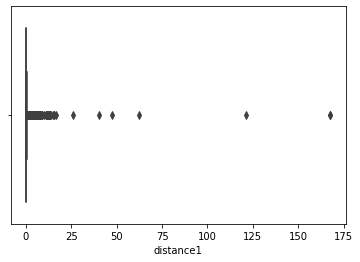

In [15]:
sns.boxplot(new_df['distance1'])

In [16]:
new_df[new_df['distance1']==0]['ID'].count()

ID    2417
ID    2417
dtype: int64

In [17]:
nearest_df2 = df.iloc[index2]
nearest_df2

,ID,governerate,region,Address,Lat,Long
29,30,Al Fayyum,Markaz Al-Fayyum,Fayoum train station,29.308889,30.847499
7,8,Al Fayyum,Markaz Al-Fayyum,10th of Ramadan - Industrial Zone B1,29.321487,30.837896
5,6,Al Fayyum,Markaz Al-Fayyum,AlFayoum 45 AlHorreya St. Fayoum,29.307723,30.846140
25,26,Al Fayyum,Markaz Sinnuris,Abdul Salam Aref Street - Senoras,29.415401,30.864294
27,28,Al Fayyum,Markaz Itsa,Bahr Arous Street - Atsa,29.241437,30.795185
...,...,...,...,...,...,...
4261,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257
4236,4237,As Suways,Kism 'Ataqah,Egyptian-Chinese Joint Investment Corporation ...,29.670297,32.317752
4236,4237,As Suways,Kism 'Ataqah,Egyptian-Chinese Joint Investment Corporation ...,29.670297,32.317752
4258,4259,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833


In [18]:
new_df = pd.concat([new_df.reset_index(drop=True),nearest_df2.reset_index(drop=True)], axis=1)

In [19]:
dummy = [round(x, 3) for x in near_dis2]

In [20]:
new_df['distance2'] = dummy
new_df['distance2_in_meters'] = new_df['distance2'] * 1000
new_df

,ID,governerate,region,Address,Lat,Long,ID,governerate,region,Address,...,distance1,distance1_in_meters,ID,governerate,region,Address,Lat,Long,distance2,distance2_in_meters
0,1,Al Fayyum,Markaz Al-Fayyum,Alfayoum Beghous Alhoriea St.,29.304412,30.853546,22,Al Fayyum,Markaz Al-Fayyum,"12 Khaled Bin Al Waleed Street, Baghous, Fayoum",...,0.168,168.0,30,Al Fayyum,Markaz Al-Fayyum,Fayoum train station,29.308889,30.847499,0.769,769.0
1,2,Al Fayyum,Markaz Al-Fayyum,Fayoum University,29.319696,30.835641,33,Al Fayyum,Markaz Al-Fayyum,Fayoum University,...,0.000,0.0,8,Al Fayyum,Markaz Al-Fayyum,10th of Ramadan - Industrial Zone B1,29.321487,30.837896,0.296,296.0
2,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,29.308199,30.842229,3,Al Fayyum,Markaz Al-Fayyum,Fayoum AlHoriea St.,...,0.000,0.0,6,Al Fayyum,Markaz Al-Fayyum,AlFayoum 45 AlHorreya St. Fayoum,29.307723,30.846140,0.383,383.0
3,4,Al Fayyum,Markaz Sinnuris,Sanoras - Fayoum,29.408575,30.865073,17,Al Fayyum,Markaz Sinnuris,Almadares St. Sanoras Sector Alfaioum,...,0.616,616.0,26,Al Fayyum,Markaz Sinnuris,Abdul Salam Aref Street - Senoras,29.415401,30.864294,0.763,763.0
4,5,Al Fayyum,Markaz Itsa,194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum,29.236966,30.790194,29,Al Fayyum,Markaz Itsa,Omar Ibn Al-Khattab Street - next to the local...,...,0.502,502.0,28,Al Fayyum,Markaz Itsa,Bahr Arous Street - Atsa,29.241437,30.795185,0.694,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833,4236,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,...,0.000,0.0,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257,0.239,239.0
4259,4260,As Suways,Kism 'Ataqah,K 36 Suez - Ain Sokhna Road,29.728850,32.381612,4239,As Suways,Kism 'Ataqah,K 36 Suez - Ain Sokhna Road,...,0.000,0.0,4237,As Suways,Kism 'Ataqah,Egyptian-Chinese Joint Investment Corporation ...,29.670297,32.317752,8.969,8969.0
4260,4261,As Suways,Kism 'Ataqah,Suez Sokhna Road Canary Village,29.617352,32.317460,4240,As Suways,Kism 'Ataqah,Suez Sokhna Road Canary Village,...,0.000,0.0,4237,As Suways,Kism 'Ataqah,Egyptian-Chinese Joint Investment Corporation ...,29.670297,32.317752,5.887,5887.0
4261,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,29.967901,32.553257,4262,As Suways,Kism Al-Arb'in,AlGeish St. Suez District Suez in front of Oma...,...,0.000,0.0,4259,As Suways,Kism Al-Arb'in,Suez Canal Authority Water Company,29.967446,32.550833,0.239,239.0


In [ ]:
# model to measure whether the number of the atms satisfies some sort of equation(model) based on some features like: population number, where are the atms and any other useful features

In [21]:
new_df[new_df['distance2']==0]['ID'].count()

ID    57
ID    57
ID    57
dtype: int64

/home/abduallah/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance2'>

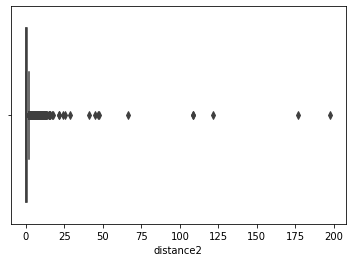

In [22]:
sns.boxplot(new_df['distance2'])

In [23]:
new_df.to_excel('nearest_atm4.xlsx')